In [40]:
#Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas as hvplot
import pandas as pd 
import requests
import csv
import os
import geopandas as gpd
from shapely.geometry import Polygon
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import openpyxl
import math

#Define the file path
file = "./Data/time_series_covid19_confirmed_US.csv"
file2 = "./Data/Table.csv"
file3 = "./Data/time_series_covid19_confirmed_global (1).csv"
file4 = "./Data/UID_ISO_FIPS_LookUp_Table.csv"
#Read the csv
covid_df = pd.read_csv(file)
covid_df.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  3/8/23  3/9/23  
0   19759   19759   19790   19790  
1   69767   69767   69860   69860  
2    7474    7474    7485    7485  
3    8087    8087    8091    8091  
4   18673   18673   18704   18704  

[5 rows x 1154 columns]

In [41]:
#Cleaning the data
clean_df = covid_df.loc[(covid_df["Long_"] != 0.0) & (covid_df["Lat"] != 0.0)]
clean_df = clean_df.dropna()

clean_df.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  3/8/23  3/9/23  
0   19759   19759   19790   19790  
1   69767   69767   69860   69860  
2    7474    7474    7485    7485  
3    8087    8087    8091    8091  
4   18673   18673   18704   18704  

[5 rows x 1154 columns]

In [42]:
#Example
minnesota_df = clean_df.loc[covid_df["Province_State"] == "Minnesota"]
minnesota_df.head()

UID iso2 iso3  code3     FIPS    Admin2 Province_State  \
1369  84027001   US  USA    840  27001.0    Aitkin      Minnesota   
1370  84027003   US  USA    840  27003.0     Anoka      Minnesota   
1371  84027005   US  USA    840  27005.0    Becker      Minnesota   
1372  84027007   US  USA    840  27007.0  Beltrami      Minnesota   
1373  84027009   US  USA    840  27009.0    Benton      Minnesota   

     Country_Region        Lat      Long_  ... 2/28/23  3/1/23  3/2/23  \
1369             US  46.609620 -93.411683  ...    3679    3679    3696   
1370             US  45.274760 -93.246046  ...  118906  118906  119208   
1371             US  46.934794 -95.671581  ...   10456   10456   10489   
1372             US  47.973735 -94.937321  ...   14326   14326   14371   
1373             US  45.698050 -93.995141  ...   16981   16981   17025   

      3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
1369    3696    3696    3696    3696    3696    3696    3702  
1370  119208  119208  119208  119208  119208  119208  119415  
1371   10489   10489   10489   10489   10489   10489   10509  
1372   14371   14371   14371   14371   14371   14371   14406  
1373   17025   17025   17025   17025   17025   17025   17064  

[5 rows x 1154 columns]

In [43]:
minnesota_map = minnesota_df.hvplot.points(
    "Long_",
    "Lat",
    geo = True,
    color="Admin2"
    
)
minnesota_map

:Points   [Long_,Lat]   (Admin2)

<Axes: xlabel='Admin2'>

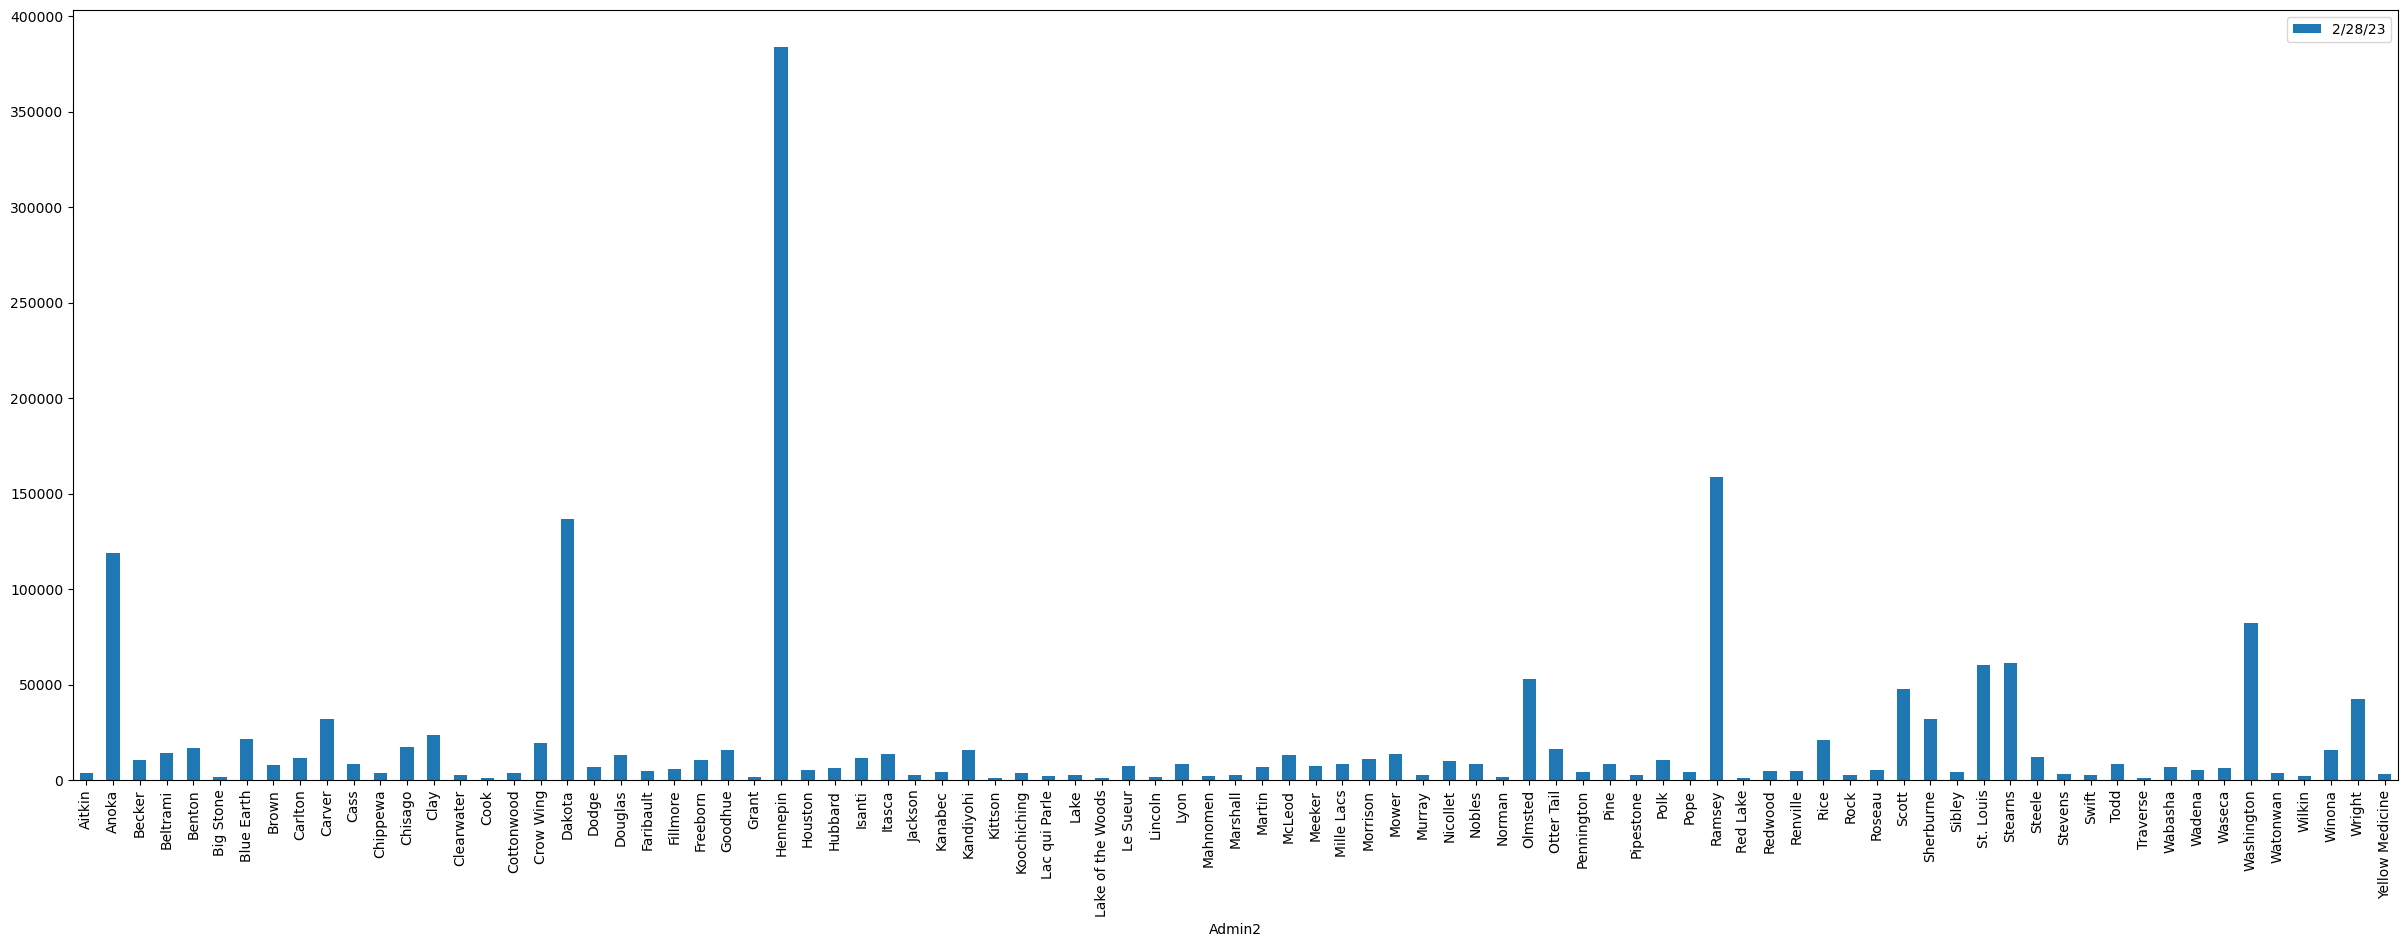

In [44]:
minnesota_df.plot("Admin2","2/28/23",kind="bar",figsize=(30,10))


In [45]:
#Mysee's state: Wisconsin
wisconsin_df = clean_df.loc[covid_df["Province_State"] == "Wisconsin"]
wisconsin_df.head()

UID iso2 iso3  code3     FIPS    Admin2 Province_State  \
3243  84055001   US  USA    840  55001.0     Adams      Wisconsin   
3244  84055003   US  USA    840  55003.0   Ashland      Wisconsin   
3245  84055005   US  USA    840  55005.0    Barron      Wisconsin   
3246  84055007   US  USA    840  55007.0  Bayfield      Wisconsin   
3247  84055009   US  USA    840  55009.0     Brown      Wisconsin   

     Country_Region        Lat      Long_  ... 2/28/23  3/1/23  3/2/23  \
3243             US  43.969747 -89.767828  ...    5840    5842    5843   
3244             US  46.319569 -90.678371  ...    4154    4157    4159   
3245             US  45.423727 -91.848336  ...   16100   16106   16109   
3246             US  46.528688 -91.197167  ...    4384    4385    4385   
3247             US  44.452655 -88.004118  ...  102838  102895  102933   

      3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
3243    5844    5844    5844    5849    5852    5854    5855  
3244    4160    4160    4160    4164    4169    4169    4171  
3245   16116   16116   16116   16124   16127   16130   16134  
3246    4386    4386    4386    4387    4387    4387    4388  
3247  102960  102960  102960  103009  103053  103098  103132  

[5 rows x 1154 columns]

In [46]:
# Using Micah's code, clean up the data frame but do not dispose in order to track sum of each state per time point.

# Attempt 1.2 with help from Xpert Learning Assistant
USA_rollingCOVID19totalINFECTIONSperSTATE_df = clean_df[["Province_State", "1/31/20", "2/28/20", "3/31/20", "4/30/20", "5/31/20", "6/30/20", "7/31/20", "8/31/20", "9/30/20", "10/31/20", "11/30/20", "12/31/20", "1/31/21", "2/28/21", "3/31/21", "4/30/21", "5/31/21", "6/30/21", "7/31/21", "8/31/21", "9/30/21", "10/31/21", "11/30/21", "12/31/21", "1/31/22", "2/28/22", "3/31/22", "4/30/22", "5/31/22", "6/30/22", "7/31/22", "8/31/22", "9/30/22", "10/31/22", "11/30/22", "12/31/22", "1/31/23", "2/28/23"]]
USA_rollingCOVID19totalINFECTIONSperSTATE_df.set_index("Province_State", inplace=True)
USA_rollingCOVID19totalINFECTIONSperSTATE_df = USA_rollingCOVID19totalINFECTIONSperSTATE_df.groupby("Province_State").sum()
# Add column for US states where length is total 52 (including header and add the two provinces: DC and Puerto Rico)
USstatesANDprovince = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "District of Columbia", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
USA_rollingCOVID19totalINFECTIONSperSTATE_df["Province_State"] = USstatesANDprovince
USA_rollingCOVID19totalINFECTIONSperSTATE_df



1/31/20  2/28/20  3/31/20  4/30/20  5/31/20  6/30/20  \
Province_State                                                               
Alabama                     0        0     1063     7187    18200    38477   
Alaska                      0        0      129      360      484     1142   
Arizona                     1        1     1289     7655    19936    79227   
Arkansas                    0        0      489     3113     7065    20056   
California                  3       13     8011    50711   113865   240802   
Colorado                    0        0     2837    19755    29001    36265   
Connecticut                 0        0     3051    27238    41967    46310   
Delaware                    0        0      319     4709     9447    11436   
District of Columbia        0        0      495     4323     8801    10327   
Florida                     0        0     6739    33683    56079   152289   
Georgia                     0        0     3764    24908    43353    74581   
Hawaii                      0        0      191      609      642      900   
Idaho                       0        0      515     1984     2839     6116   
Illinois                    2        2     5976    52540   120057   143136   
Indiana                     0        0     2158    17835    34574    45594   
Iowa                        0        0      495     7121    19551    29071   
Kansas                      0        0      434     4413     9700    14370   
Kentucky                    0        0      614     4655     9698    15622   
Louisiana                   0        0     5215    27940    39832    58093   
Maine                       0        0      297     1094     2323     3251   
Maryland                    0        0     1660    21742    52778    67559   
Massachusetts               1        2     9911    66571    96677   103627   
Michigan                    0        0     7838    41904    58482    66331   
Minnesota                   0        0      629     5127    24761    36220   
Mississippi                 0        0      937     6815    15523    27247   
Missouri                    0        0     1555     7544    12373    19746   
Montana                     0        0      198      453      515      967   
Nebraska                    0        0      169     4233    13882    19003   
Nevada                      0        0     1012     5053     8628    18456   
New Hampshire               0        0      357     2143     4645     5781   
New Jersey                  0        0    15010   118174   160258   171991   
New Mexico                  0        0      315     3411     7462    11242   
New York                    0        0    75853   308309   373682   395909   
North Carolina              0        0     1578    11120    29514    67226   
North Dakota                0        0      122     1108     2627     3617   
Ohio                        0        0     2199    18027    35513    51789   
Oklahoma                    0        0      566     3618     6418    13757   
Oregon                      0        0      690     2510     4243     8656   
Pennsylvania                0        0     4963    47953    75663    90473   
Puerto Rico                 0        0        0      839     1218     1621   
Rhode Island                0        0      304     7534    13071    15229   
South Carolina              0        0     1083     6095    11861    36399   
South Dakota                0        0      108     2449     4993     6764   
Tennessee                   0        0     1894    11653    23015    43225   
Texas                       0        0     3809    23369    53526   165267   
Utah                        0        0      818     4308     8758    17968   
Vermont                     0        0      282      863      976     1202   
Virginia                    0        0     1249    15847    44607    62787   
Washington                  1        1     5158    14267    21634    33414   
West Virginia               0        0      

In [47]:
Year_2020_2023_dates = ["1/31/20", "2/28/20", "3/31/20", "4/30/20", "5/31/20", "6/30/20", "7/31/20", "8/31/20", "9/30/20", "10/31/20", "11/30/20", "12/31/20", "1/31/21", "2/28/21", "3/31/21", "4/30/21", "5/31/21", "6/30/21", "7/31/21", "8/31/21", "9/30/21", "10/31/21", "11/30/21", "12/31/21", "1/31/22", "2/28/22", "3/31/22", "4/30/22", "5/31/22", "6/30/22", "7/31/22", "8/31/22", "9/30/22", "10/31/22", "11/30/22", "12/31/22", "1/31/23", "2/28/23"]
# Attempt 1.2 with help from Xpert Learning Assistant; copied from previous code. Adjusted to be just March 9, 2023
USA_rollingCOVID19totalINFECTIONSperSTATE_2023_March_9_df = clean_df[["Province_State", "3/9/23"]]
USA_rollingCOVID19totalINFECTIONSperSTATE_2023_March_9_df.set_index("Province_State", inplace=True)
USA_rollingCOVID19totalINFECTIONSperSTATE_2023_March_9_df = USA_rollingCOVID19totalINFECTIONSperSTATE_2023_March_9_df.groupby("Province_State").sum()
# Add column for US states where length is total 52 (including header and add the two provinces: DC and Puerto Rico)
USstatesANDprovince = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "District of Columbia", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
USA_rollingCOVID19totalINFECTIONSperSTATE_2023_March_9_df["Province_State"] = USstatesANDprovince
USA_rollingCOVID19totalINFECTIONSperSTATE_2023_March_9_df


3/9/23        Province_State
Province_State                                      
Alabama                1644533               Alabama
Alaska                  307649                Alaska
Arizona                2443514               Arizona
Arkansas                973278              Arkansas
California            12125315            California
Colorado               1764140              Colorado
Connecticut             973386           Connecticut
Delaware                329683              Delaware
District of Columbia    177945  District of Columbia
Florida                7571283               Florida
Georgia                2956578               Georgia
Hawaii                  371456                Hawaii
Idaho                   521120                 Idaho
Illinois               4083223              Illinois
Indiana                2051104               Indiana
Iowa                    903991                  Iowa
Kansas                  938184                Kansas
Kentucky               1715967              Kentucky
Louisiana              1572568             Louisiana
Maine                   318129                 Maine
Maryland               1365297              Maryland
Massachusetts          2014483         Massachusetts
Michigan               3011918              Michigan
Minnesota              1777970             Minnesota
Mississippi             990756           Mississippi
Missouri               1637608              Missouri
Montana                 329386               Montana
Nebraska                565924              Nebraska
Nevada                  878616                Nevada
New Hampshire           376098         New Hampshire
New Jersey             3047338            New Jersey
New Mexico              663714            New Mexico
New York               6793753              New York
North Carolina         3472644        North Carolina
North Dakota            286950          North Dakota
Ohio                   3400652                  Ohio
Oklahoma               1290777              Oklahoma
Oregon                  963561                Oregon
Pennsylvania           3527854          Pennsylvania
Puerto Rico            1075384           Puerto Rico
Rhode Island            430552          Rhode Island
South Carolina         1836568        South Carolina
South Dakota            279130          South Dakota
Tennessee              2408633             Tennessee
Texas                  8364755                 Texas
Utah                    815255                  Utah
Vermont                 148173               Vermont
Virginia               2291951              Virginia
Washington             1925616            Washington
West Virginia           641856         West Virginia
Wisconsin              2006582             Wisconsin
Wyoming                 185385               Wyoming

Text(0.5, 1.0, "Wisconsin's Total Confirmed COVID19 Cases by County on February 28, 2023")

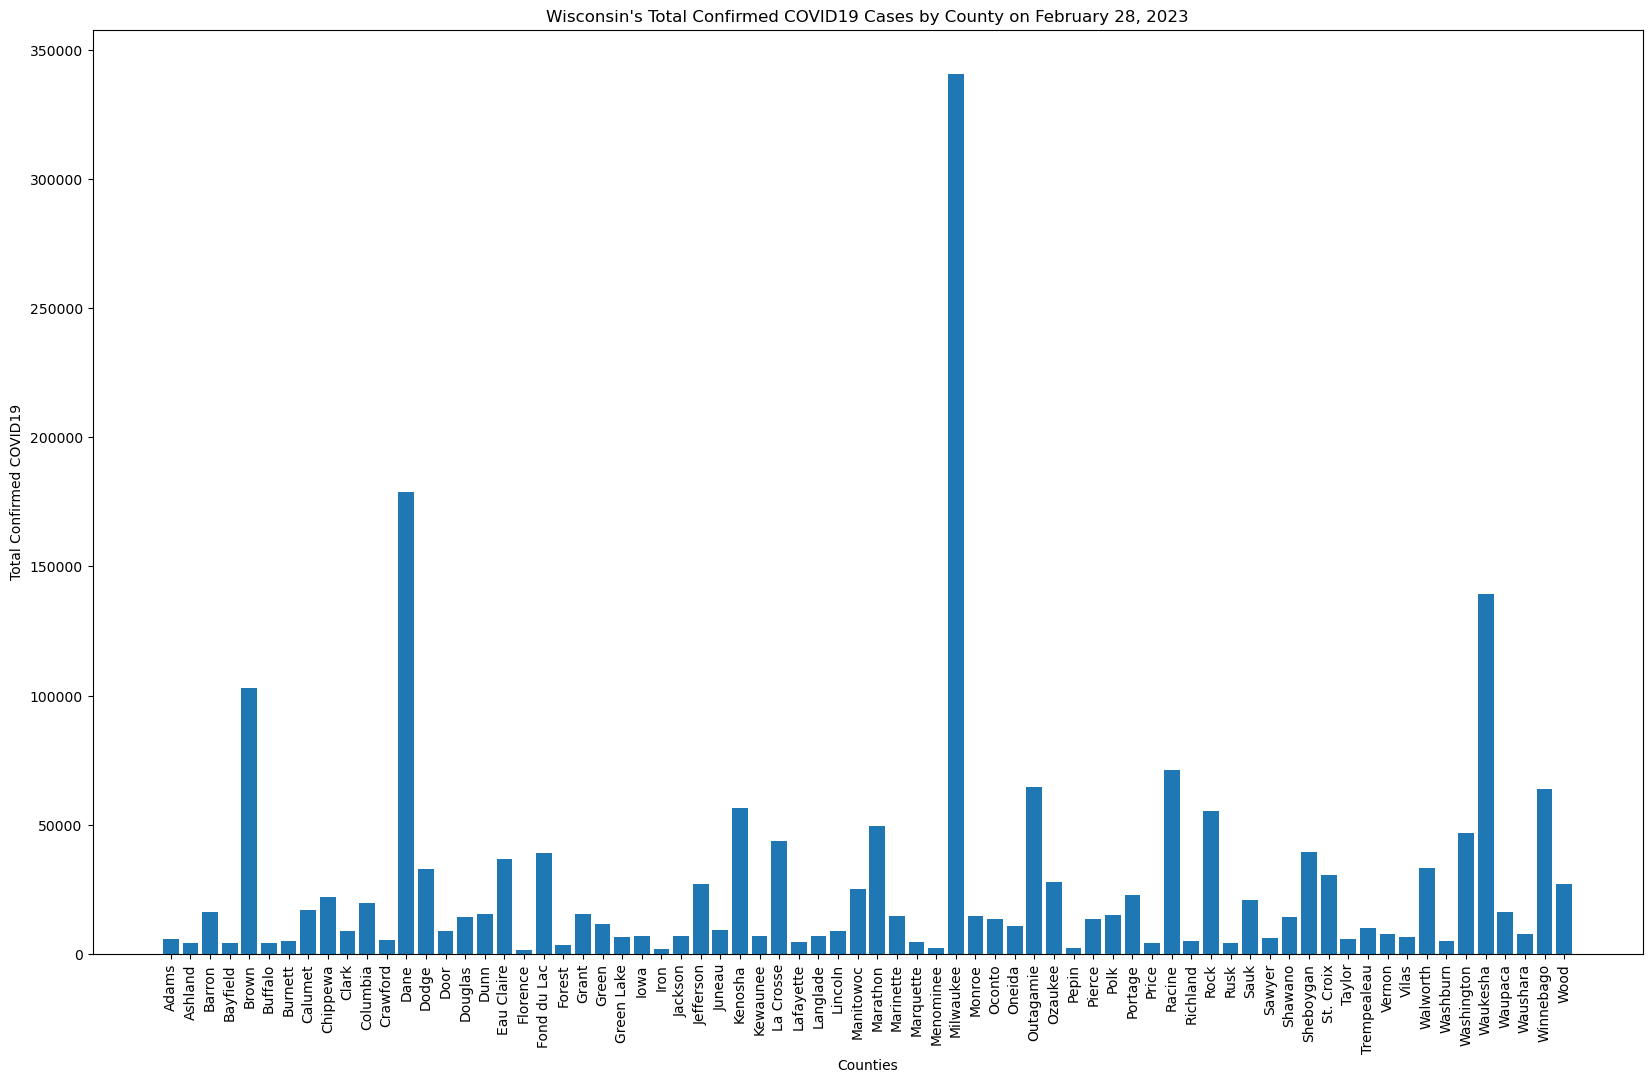

In [48]:
# Adjust size of bar chart
plt.figure(figsize=(20,12))
# Plot running total of all Wisconsin counties
plt.bar(wisconsin_df["Admin2"], wisconsin_df["2/28/23"])
# Add and format labels
plt.xlabel("Counties")
plt.xticks(rotation=90) # Rotate x-axis ticks for easier reading
plt.ylabel("Total Confirmed COVID19")
plt.title("Wisconsin's Total Confirmed COVID19 Cases by County on February 28, 2023")

In [49]:
# Make a cleaned MN df
Minnesota_df = clean_df.loc[covid_df["Province_State"] == "Minnesota"]
# Include counties and dates from 1/30/20 to 3/9/23
# Minnesota_df["Counties"] = Minnesota_df["Admin2"]
Minnesota_df = Minnesota_df[["Admin2", "1/31/20", "2/28/20", "3/31/20", "4/30/20", "5/31/20", "6/30/20", "7/31/20", "8/31/20", "9/30/20", "10/31/20", "11/30/20", "12/31/20", "1/31/21", "2/28/21", "3/31/21", "4/30/21", "5/31/21", "6/30/21", "7/31/21", "8/31/21", "9/30/21", "10/31/21", "11/30/21", "12/31/21", "1/31/22", "2/28/22", "3/31/22", "4/30/22", "5/31/22", "6/30/22", "7/31/22", "8/31/22", "9/30/22", "10/31/22", "11/30/22", "12/31/22", "1/31/23", "2/28/23"]]
Minnesota_df = Minnesota_df.set_index("Admin2")
# Transpose for easier processing by county
Minnesota_df = Minnesota_df.transpose()
# Create new column for dates/timepoints
Minnesota_df["timepoints"] = Year_2020_2023_dates
Minnesota_df








Admin2    Aitkin   Anoka  Becker  Beltrami  Benton  Big Stone  Blue Earth  \
1/31/20        0       0       0         0       0          0           0   
2/28/20        0       0       0         0       0          0           0   
3/31/20        0      23       0         4       1          1           9   
4/30/20        1     212       2         6      15          2          38   
5/31/20        8    1399      40        15     177          5         140   
6/30/20       14    2097      54        27     208         14         403   
7/31/20       27    3245     134       184     299         22         824   
8/31/20       48    4741     198       321     402         35        1243   
9/30/20       88    6343     286       473     568         83        1743   
10/31/20     224    9812     683      1002    1121        172        2169   
11/30/20     778   22583    2094      2192    3057        324        4180   
12/31/20    1023   28973    2680      2871    3888        434        5040   
1/31/21     1129   31777    2929      3209    4292        471        5545   
2/28/21     1187   33231    3107      3372    4457        516        5926   
3/31/21     1217   35529    3287      3554    4929        543        6530   
4/30/21     1319   40215    3705      3820    5526        588        7267   
5/31/21     1370   42490    3850      4048    5808        603        7605   
6/30/21     1390   42844    3870      4082    5831        605        7636   
7/31/21     1402   43482    3900      4118    5882        613        7728   
8/31/21     1480   45941    4071      4579    6123        632        8210   
9/30/21     1628   49997    4752      5594    6817        720        9034   
10/31/21    1893   55176    5507      6808    7706        813        9872   
11/30/21    2215   63852    6271      8160    9018        946       11448   
12/31/21    2424   71618    6618      8803   10048       1014       12732   
1/31/22     2710   91790    7801     10467   12627       1243       16053   
2/28/22     2906   97364    8629     11290   13761       1363       17444   
3/31/22     2944   98229    8774     11971   13987       1379       17850   
4/30/22     3003   99314    8862     12087   14136       1406       18170   
5/31/22     3100  102339    9049     12295   14505       1440       18548   
6/30/22     3184  105103    9244     12550   14910       1465       19000   
7/31/22     3259  107423    9438     12761   15248       1491       19390   
8/31/22     3347  110012    9714     13114   15625       1556       19826   
9/30/22     3422  112105    9899     13420   15966       1595       20201   
10/31/22    3523  113538   10035     13610   16168       1630       20360   
11/30/22    3554  114857   10140     13722   16399       1683       20592   
12/31/22    3623  116729   10292     13983   16655       1720       20871   
1/31/23     3656  117884   10387     14137   16830       1740       21068   
2/28/23     3679  118906   10456     14326   16981       1763       21271   

Admin2    Brown  Carlton  Carver  ...  Wabasha  Wadena  Waseca  Washington  \
1/31/20       0        0       0  ...        0       0       0           0   
2/28/20       0        0       0  ...        0       0       0           0   
3/31/20       2        1      10  ...        6       0       3          39   
4/30/20       8       59      21  ...        8       1       4         131   
5/31/20      16       73     210  ...       18      10      26         636   
6/30/20      30       81     340  ...       31      15      57        1008   
7/31/20      79      121     744  ...       78      23     128        1817   
8/31/20     128      191    1123  ...      123      49     266        2996   
9/30/20     199      286    1451  ...      208      73     722        3950   
10/31/20    373      550    1938  ...      435     292     956        6861   
11/30/20   1457     1913    4862  ...     1078     815    1398       14207   
12/31/20   2011     2595    6449  ...     1500    1123    17

Text(0.5, 1.0, "Minnesota's Total Confirmed COVID19 Cases by County from January 2020 to February 2023")

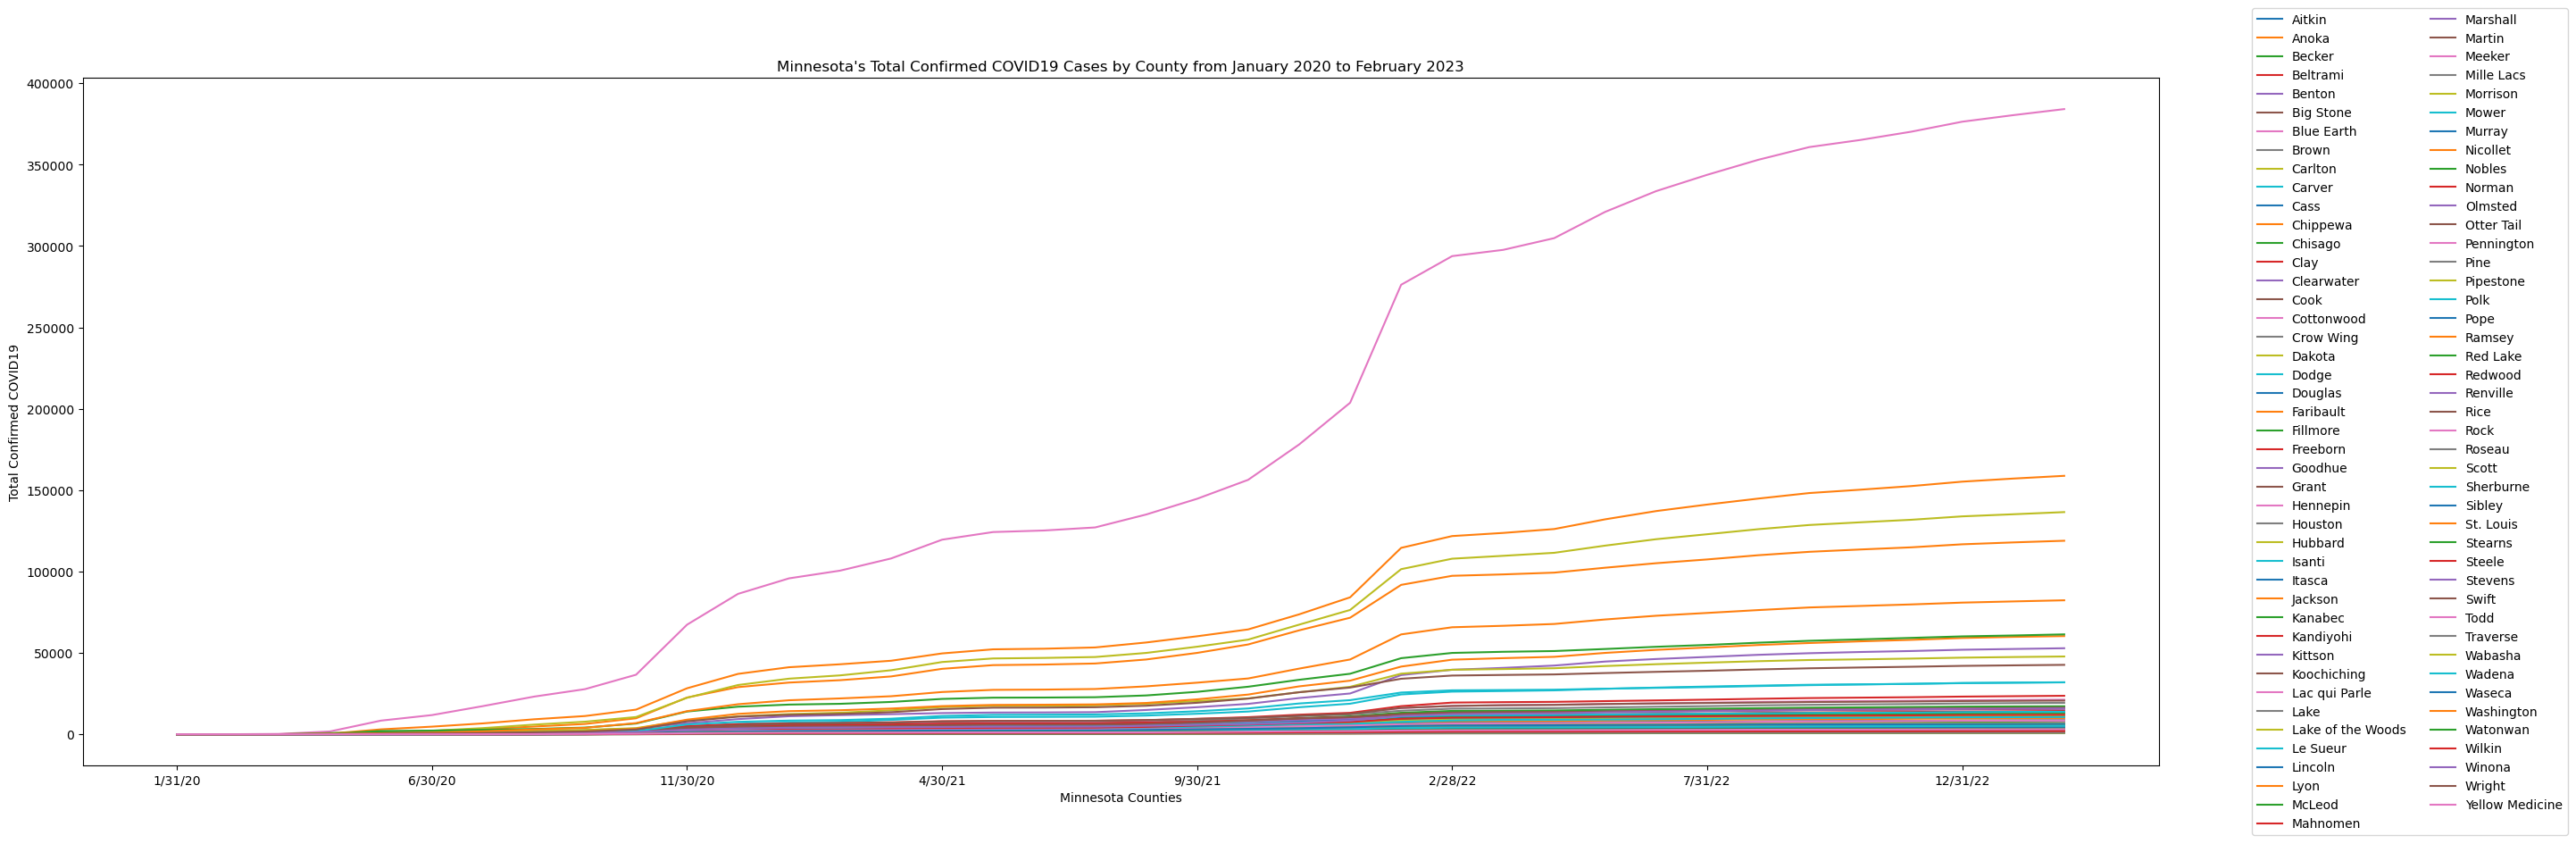

In [50]:
Minnesota_df.plot(x="timepoints", y=["Aitkin", "Anoka", "Becker", "Beltrami", "Benton", "Big Stone", "Blue Earth", "Brown", "Carlton", "Carver", "Cass", "Chippewa", "Chisago", "Clay", "Clearwater", "Cook", "Cottonwood", "Crow Wing", "Dakota", "Dodge", "Douglas", "Faribault", "Fillmore", "Freeborn", "Goodhue", "Grant", "Hennepin", "Houston", "Hubbard", "Isanti", "Itasca", "Jackson", "Kanabec", "Kandiyohi", "Kittson", "Koochiching", "Lac qui Parle", "Lake", "Lake of the Woods", "Le Sueur", "Lincoln", "Lyon", "McLeod", "Mahnomen", "Marshall", "Martin", "Meeker", "Mille Lacs", "Morrison", "Mower", "Murray", "Nicollet", "Nobles", "Norman", "Olmsted", "Otter Tail", "Pennington", "Pine", "Pipestone", "Polk", "Pope", "Ramsey", "Red Lake", "Redwood", "Renville", "Rice", "Rock", "Roseau", "Scott", "Sherburne", "Sibley", "St. Louis", "Stearns", "Steele", "Stevens", "Swift", "Todd", "Traverse", "Wabasha", "Wadena", "Waseca", "Washington", "Watonwan", "Wilkin", "Winona", "Wright", "Yellow Medicine"], kind="line", figsize=(30,10))
plt.xlabel("Minnesota Counties")
plt.ylabel("Total Confirmed COVID19")
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=2)
plt.title("Minnesota's Total Confirmed COVID19 Cases by County from January 2020 to February 2023")

Text(0.5, 1.0, "Minnesota's Top Five Counties' Total Confirmed COVID19 Cases from January 2020 to February 2023")

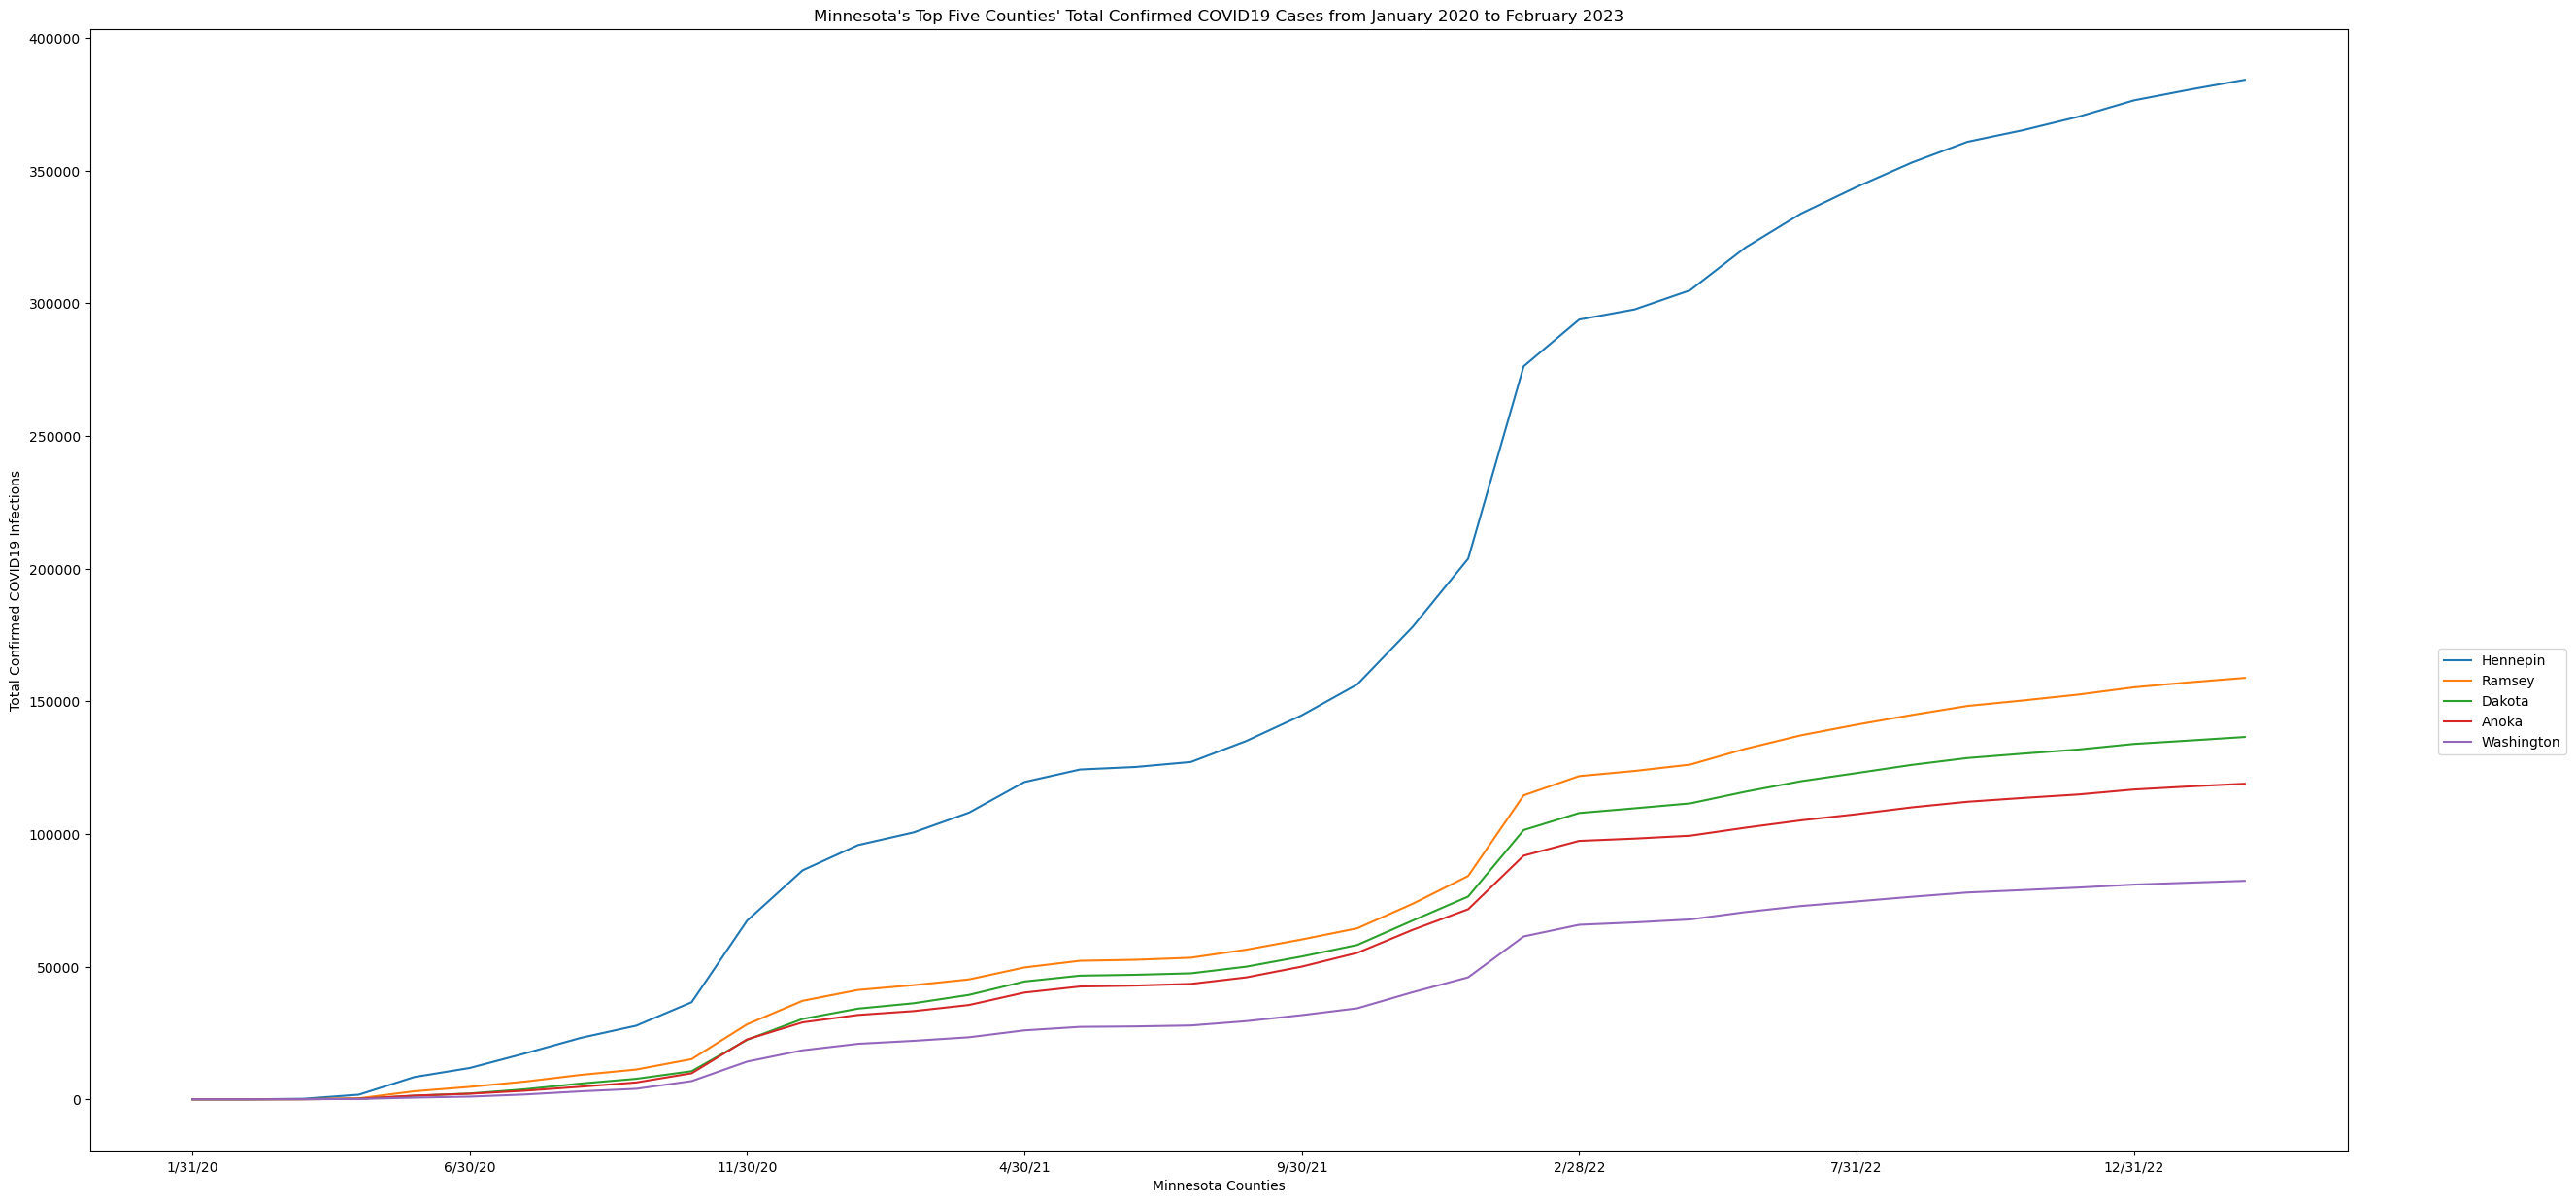

In [51]:
Minnesota_df.plot(x="timepoints", y=["Hennepin", "Ramsey", "Dakota", "Anoka", "Washington"], kind="line", figsize=(30,15))
plt.xlabel("Minnesota Counties")
plt.ylabel("Total Confirmed COVID19 Infections")
plt.legend(loc='right', bbox_to_anchor=(1.1, 0.4), ncol=1)
plt.title("Minnesota's Top Five Counties' Total Confirmed COVID19 Cases from January 2020 to February 2023")

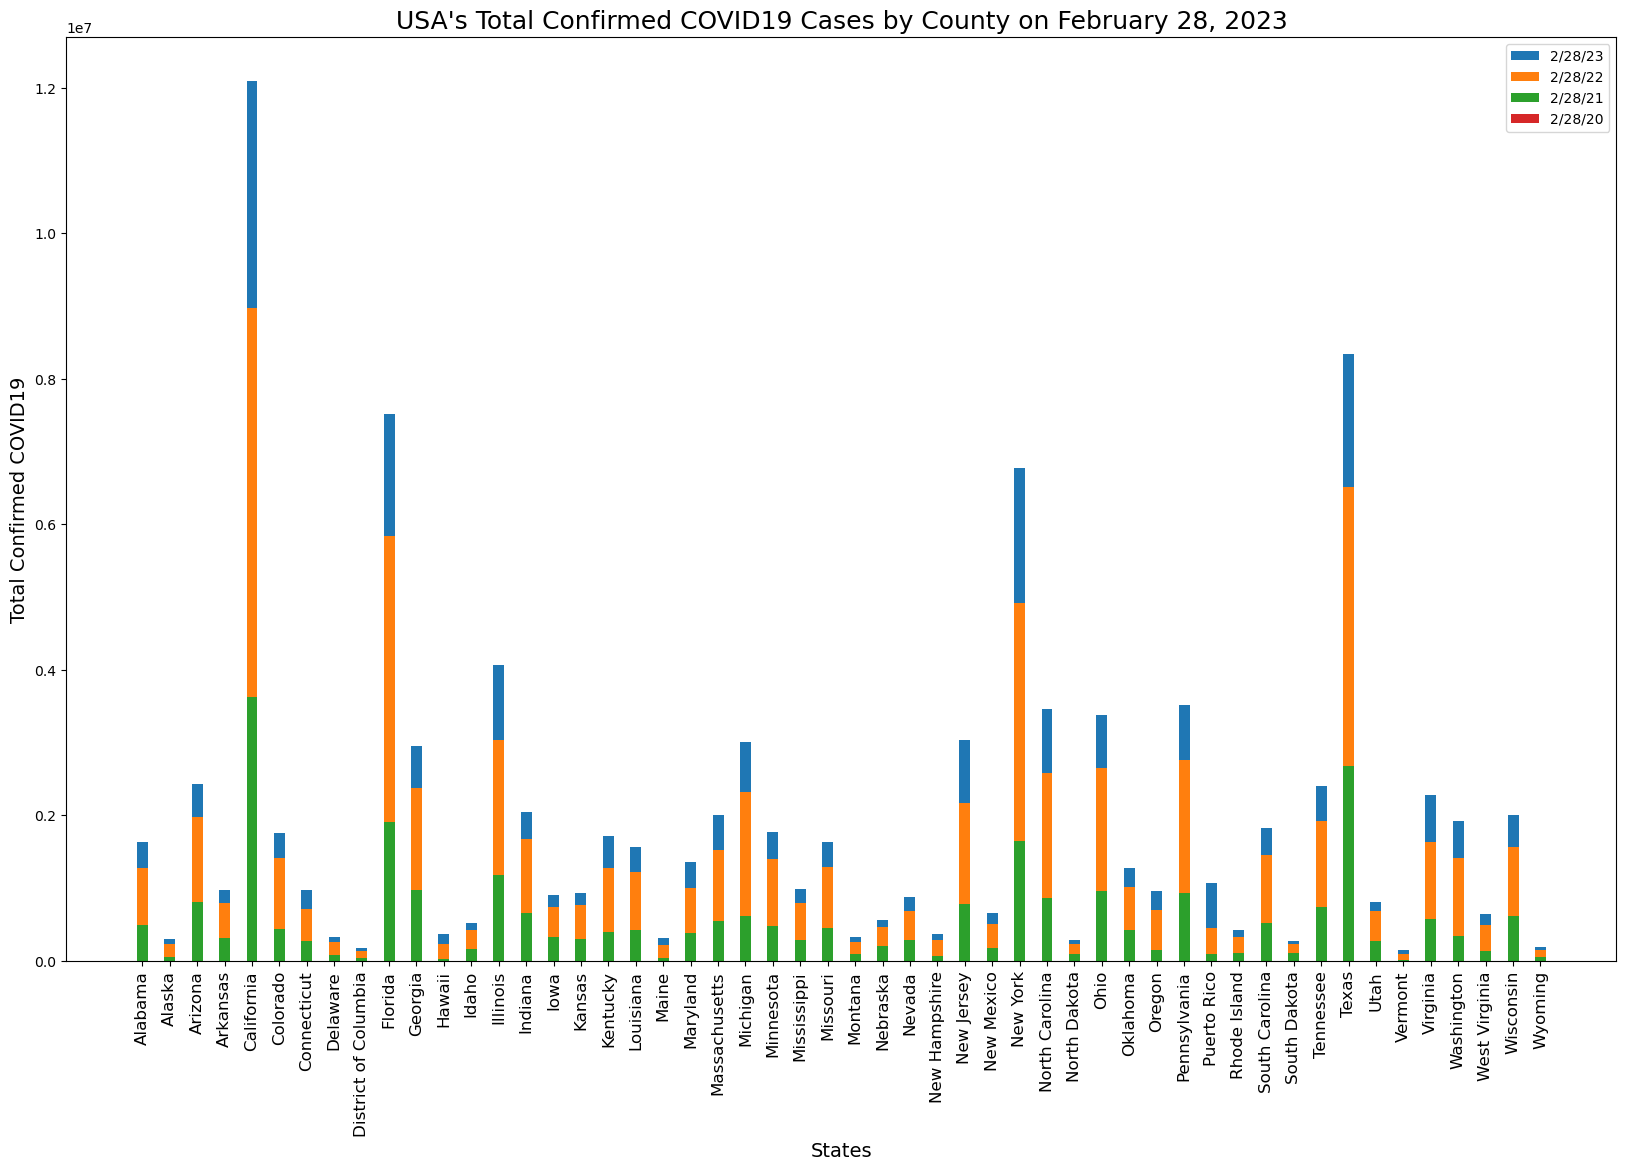

In [52]:
# Adjust size of bar chart
plt.figure(figsize=(20, 12))

# Plot running total of all Wisconsin counties
bar_width = 0.4  # Set the width of the bars for better visibility
plt.bar(USA_rollingCOVID19totalINFECTIONSperSTATE_df["Province_State"], USA_rollingCOVID19totalINFECTIONSperSTATE_df["2/28/23"], label='2/28/23', width=bar_width)
plt.bar(USA_rollingCOVID19totalINFECTIONSperSTATE_df["Province_State"], USA_rollingCOVID19totalINFECTIONSperSTATE_df["2/28/22"], label='2/28/22', width=bar_width)
plt.bar(USA_rollingCOVID19totalINFECTIONSperSTATE_df["Province_State"], USA_rollingCOVID19totalINFECTIONSperSTATE_df["2/28/21"], label='2/28/21', width=bar_width)
plt.bar(USA_rollingCOVID19totalINFECTIONSperSTATE_df["Province_State"], USA_rollingCOVID19totalINFECTIONSperSTATE_df["2/28/20"], label='2/28/20', width=bar_width)

# Add and format labels
plt.xlabel("States", fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis ticks for easier reading
plt.ylabel("Total Confirmed COVID19", fontsize=14)
plt.title("USA's Total Confirmed COVID19 Cases by County on February 28, 2023", fontsize=18)

# Add a legend
plt.legend()

# Show the plot
plt.show()

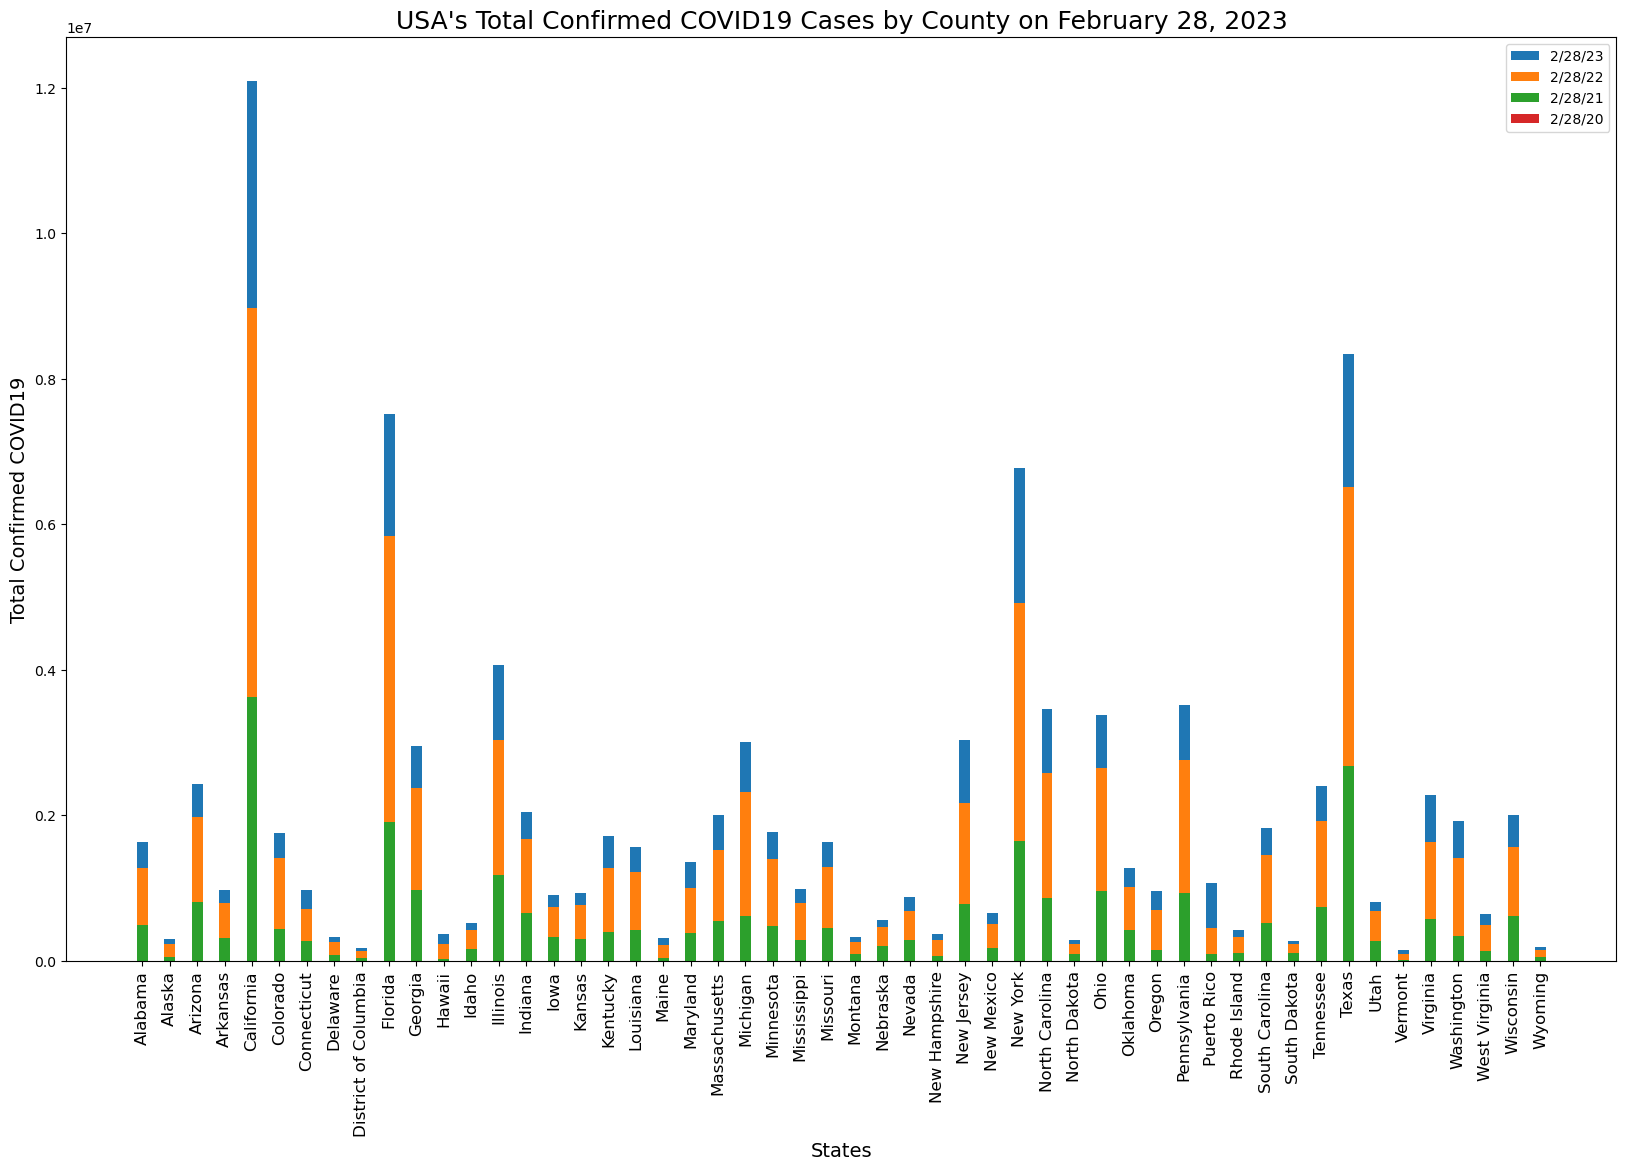

In [53]:
# Adjust size of bar chart
plt.figure(figsize=(20, 12))

# Plot running total of all Wisconsin counties
bar_width = 0.4  # Set the width of the bars for better visibility
plt.bar(USA_rollingCOVID19totalINFECTIONSperSTATE_df["Province_State"], USA_rollingCOVID19totalINFECTIONSperSTATE_df["2/28/23"], label='2/28/23', width=bar_width)
plt.bar(USA_rollingCOVID19totalINFECTIONSperSTATE_df["Province_State"], USA_rollingCOVID19totalINFECTIONSperSTATE_df["2/28/22"], label='2/28/22', width=bar_width)
plt.bar(USA_rollingCOVID19totalINFECTIONSperSTATE_df["Province_State"], USA_rollingCOVID19totalINFECTIONSperSTATE_df["2/28/21"], label='2/28/21', width=bar_width)
plt.bar(USA_rollingCOVID19totalINFECTIONSperSTATE_df["Province_State"], USA_rollingCOVID19totalINFECTIONSperSTATE_df["2/28/20"], label='2/28/20', width=bar_width)

# Add and format labels
plt.xlabel("States", fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis ticks for easier reading
plt.ylabel("Total Confirmed COVID19", fontsize=14)
plt.title("USA's Total Confirmed COVID19 Cases by County on February 28, 2023", fontsize=18)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [54]:
# Make a cleaned MN df
Minnesota_df = clean_df.loc[covid_df["Province_State"] == "Minnesota"]
# Include counties and dates from 1/30/20 to 3/9/23
Minnesota_df["Counties"] = Minnesota_df["Admin2"]
Minnesota_df = Minnesota_df[["Admin2", "Counties", "1/31/20", "2/28/20", "3/31/20", "4/30/20", "5/31/20", "6/30/20", "7/31/20", "8/31/20", "9/30/20", "10/31/20", "11/30/20", "12/31/20", "1/31/21", "2/28/21", "3/31/21", "4/30/21", "5/31/21", "6/30/21", "7/31/21", "8/31/21", "9/30/21", "10/31/21", "11/30/21", "12/31/21", "1/31/22", "2/28/22", "3/31/22", "4/30/22", "5/31/22", "6/30/22", "7/31/22", "8/31/22", "9/30/22", "10/31/22", "11/30/22", "12/31/22", "1/31/23", "2/28/23"]]
Minnesota_df = Minnesota_df.set_index("Admin2")
# Transpose for easier processing by county
# Minnesota_df = Minnesota_df.transpose()
# Create new column for dates/timepoints
# Minnesota_df["timepoints"] = Year_2020_2023_dates
Minnesota_df

C:\Users\micah\AppData\Local\Temp\ipykernel_12848\3035790402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Minnesota_df["Counties"] = Minnesota_df["Admin2"]


Counties  1/31/20  2/28/20  3/31/20  4/30/20  5/31/20  \
Admin2                                                                          
Aitkin                    Aitkin        0        0        0        1        8   
Anoka                      Anoka        0        0       23      212     1399   
Becker                    Becker        0        0        0        2       40   
Beltrami                Beltrami        0        0        4        6       15   
Benton                    Benton        0        0        1       15      177   
...                          ...      ...      ...      ...      ...      ...   
Watonwan                Watonwan        0        0        1       11       74   
Wilkin                    Wilkin        0        0        1       12       11   
Winona                    Winona        0        0       10       66       79   
Wright                    Wright        0        0        6       42      313   
Yellow Medicine  Yellow Medicine        0        0        0        3        6   

                 6/30/20  7/31/20  8/31/20  9/30/20  ...  5/31/22  6/30/22  \
Admin2                                               ...                     
Aitkin                14       27       48       88  ...     3100     3184   
Anoka               2097     3245     4741     6343  ...   102339   105103   
Becker                54      134      198      286  ...     9049     9244   
Beltrami              27      184      321      473  ...    12295    12550   
Benton               208      299      402      568  ...    14505    14910   
...                  ...      ...      ...      ...  ...      ...      ...   
Watonwan             203      299      443      535  ...     3009     3062   
Wilkin                20       26       51       71  ...     1674     1714   
Winona               119      240      446      923  ...    13429    13888   
Wright               445      770     1251     1713  ...    37619    38355   
Yellow Medicine       29       47       87      200  ...     2610     2684   

                 7/31/22  8/31/22  9/30/22  10/31/22  11/30/22  12/31/22  \
Admin2                                                                     
Aitkin              3259     3347     3422      3523      3554      3623   
Anoka             107423   110012   112105    113538    114857    116729   
Becker              9438     9714     9899     10035     10140     10292   
Beltrami           12761    13114    13420     13610     13722     13983   
Benton             15248    15625    15966     16168     16399     16655   
...                  ...      ...      ...       ...       ...       ...   
Watonwan            3107     3198     3257      3285      3319      3365   
Wilkin              1750     1795     1829      1844      1864      1898   
Winona             14210    14557    14880     15115     15317     15543   
Wright             39026    39837    40534     41034     41489     42030   
Yellow Medicine     2726     2809     2859      2897      2970      3038   

                 1/31/23  2/28/23  
Admin2                             
Aitkin              3656     3679  
Anoka             117884   118906  
Becker             10387    10456  
Beltrami           14137    14326  
Benton             16830    16981  
...                  ...      ...  
Watonwan            3391     3441  
Wilkin              1922     1943  
Winona             15684    15836  
Wright             42350    42653  
Yellow Medicine     3066     3131  

[87 rows x 39 columns]

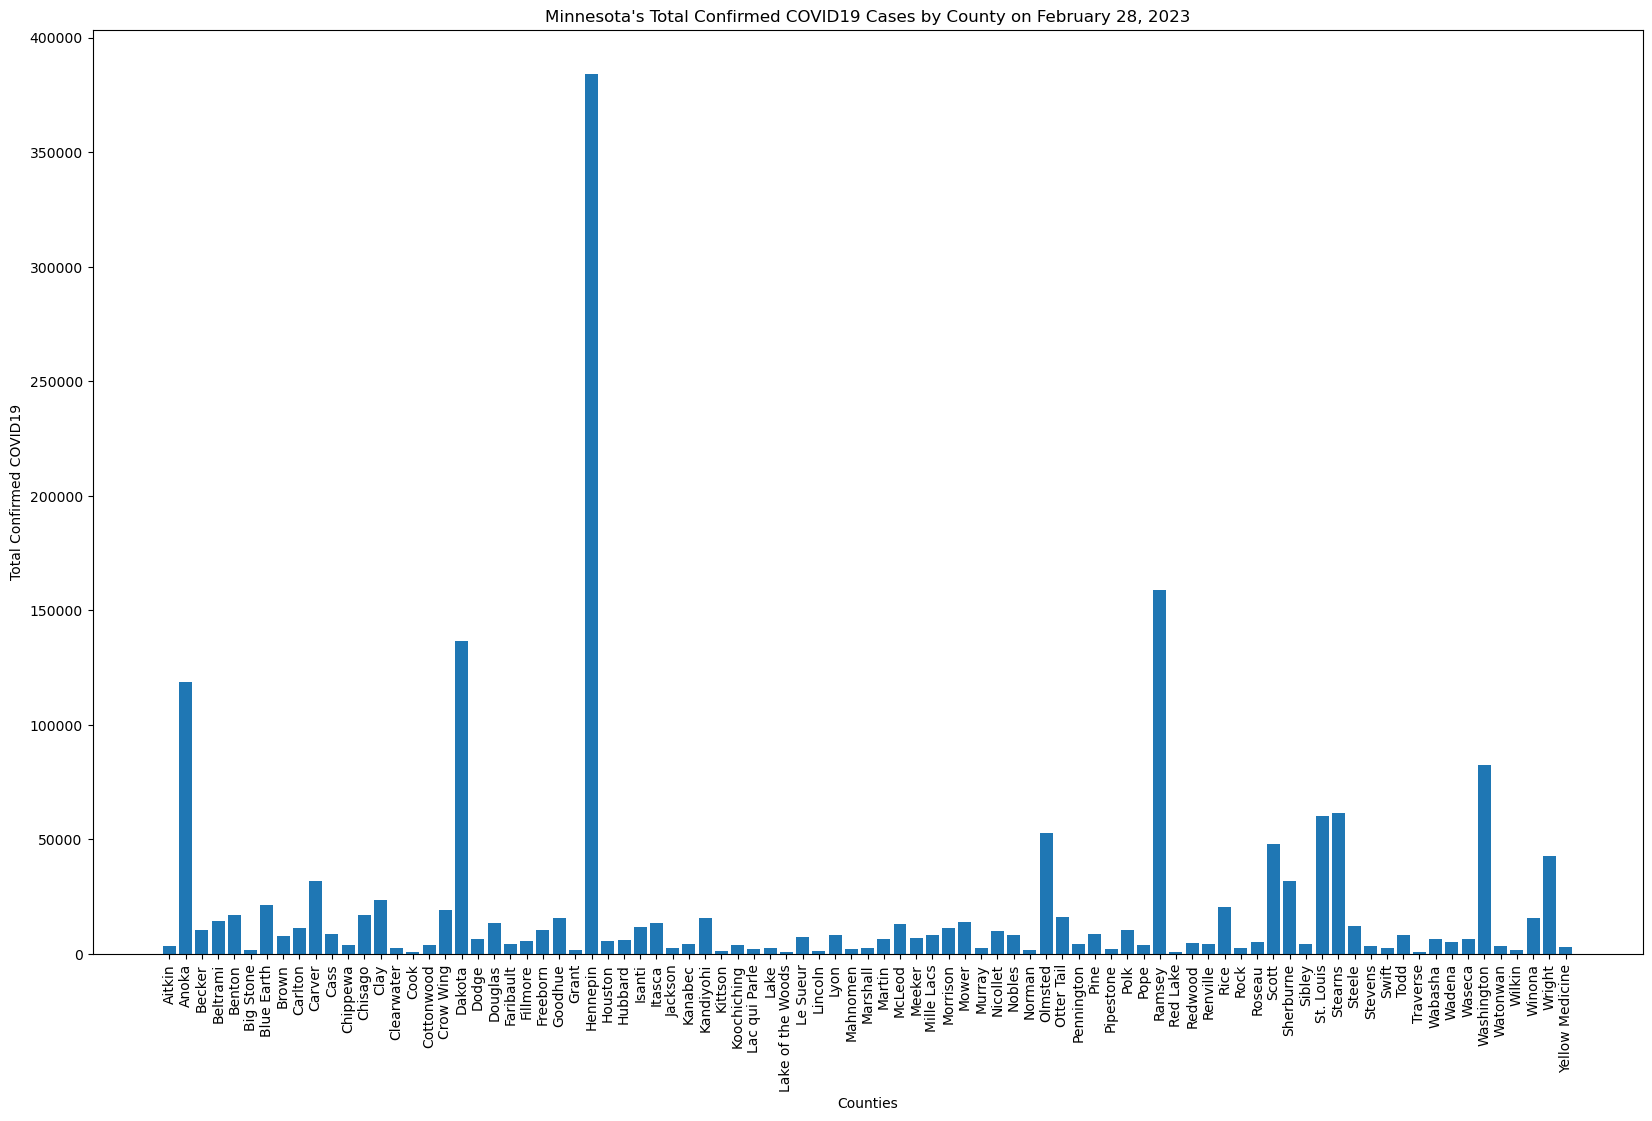

In [55]:
# Adjust size of bar chart
plt.figure(figsize=(20,12))
# Plot running total of all Wisconsin counties
plt.bar(Minnesota_df["Counties"], Minnesota_df["2/28/23"])
# Add and format labels
plt.xlabel("Counties")
plt.xticks(rotation=90) # Rotate x-axis ticks for easier reading
plt.ylabel("Total Confirmed COVID19")
plt.title("Minnesota's Total Confirmed COVID19 Cases by County on February 28, 2023")
plt.show()

In [56]:
#Samantha 
#display csv
df_bachelor= pd.read_csv('./Education/bachelor_degree.csv')
df_bachelor= df_bachelor.loc[df_bachelor["County"] != "United States"]
df_bachelor = df_bachelor.loc[df_bachelor["County"] != "Minnesota"]
print("Bachelor Degree Data:")
df_bachelor

Bachelor Degree Data:


County   FIPS  Value Bachelor(Percent)  \
2     Mahnomen County  27087                     13.7   
3         Todd County  27153                     14.8   
4      Kanabec County  27065                     15.0   
5         Pine County  27115                     15.4   
6     Traverse County  27155                     16.2   
..                ...    ...                      ...   
84        Cook County  27031                     46.4   
85     Olmsted County  27109                     47.7   
86  Washington County  27163                     47.9   
87      Carver County  27019                     49.8   
88    Hennepin County  27053                     52.6   

    People Bachelors Degree Rank within US (of 3143 counties)  
2                       444                             2,802  
3                      2604                             2,628  
4                      1725                             2,608  
5                      3304                             2,542  
6                       379                             2,407  
..                      ...                               ...  
84                     2089                               122  
85                    52339                               107  
86                    87226                               101  
87                    35232                                82  
88                   465698                                58  

[87 rows x 5 columns]

In [57]:
df_high_school = pd.read_csv('./Education/high school.csv')
df_high_school = df_high_school.loc[df_high_school["County"] != "United States"]
df_high_school = df_high_school.loc[df_high_school["County"] != "Minnesota"]
print("\nHigh School Education Data:")
df_high_school


High School Education Data:


County   FIPS  Value High School(Percent)  \
2              Nobles County  27105                        20.6   
3            Mahnomen County  27087                        13.1   
4          Clearwater County  27029                        12.4   
5            Watonwan County  27165                        12.2   
6            Freeborn County  27047                        11.5   
..                       ...    ...                         ...   
84  Lake of the Woods County  27077                         4.0   
85            Kittson County  27069                         4.0   
86         Washington County  27163                         3.8   
87             Carver County  27019                         3.7   
88               Cook County  27031                         2.8   

    People High School Education Rank within US (of 3143 counties)  
2                           2885                             2,927  
3                            423                             2,081  
4                            720                             1,979  
5                            921                             1,933  
6                           2522                             1,800  
..                           ...                               ...  
84                           116                                91  
85                           118                                84  
86                          6927                                73  
87                          2624                                62  
88                           126                                25  

[87 rows x 5 columns]

In [58]:
df_9th_grade = pd.read_csv('./Education/9th grade.csv')
df_9th_grade = df_9th_grade.loc[df_9th_grade["County"] != "United States"]
df_9th_grade = df_9th_grade.loc[df_9th_grade["County"] != "Minnesota"]
print("\n9th Grade Education Data:")
df_9th_grade


9th Grade Education Data:


County   FIPS  Value 9th Grade(Percent)  \
2              Nobles County  27105                      14.9   
3            Watonwan County  27165                       7.2   
4                Todd County  27153                       5.5   
5           Kandiyohi County  27067                       5.5   
6              Ramsey County  27123                       4.8   
..                       ...    ...                       ...   
84      Lac qui Parle County  27073                       1.1   
85            Chisago County  27025                       1.0   
86             Itasca County  27061                       1.0   
87               Cook County  27031                       0.5   
88  Lake of the Woods County  27077                       0.4   

    People 9th Grade Education Rank within US (of 3143 counties)  
2                         2079                             3,097  
3                          544                             2,760  
4                          963                             2,395  
5                         1605                             2,386  
6                        17736                             2,173  
..                         ...                               ...  
84                          52                               116  
85                         396                                97  
86                         316                                91  
87                          22                                25  
88                          11                                18  

[87 rows x 5 columns]

In [59]:
# Merge the DataFrames on the 'County' column
merged_df = df_bachelor.merge(df_high_school, on='County', suffixes=('_bachelor', '_high_school'))
merged_df = merged_df.merge(df_9th_grade, on='County')

# Rename columns for clarity if needed
merged_df.rename(columns={
    'Value Bachelor (Percent)': 'Percent_Bachelor',
    'Value High School (Percent)': 'People_High_School',
    'Value 9th Grade (Percent)': 'Percent_9th_Grade'
}, inplace=True)

# Print the merged DataFrame
print("\nMerged Data:")
merged_df


Merged Data:


County   FIPS_bachelor  Value Bachelor(Percent)  \
0     Mahnomen County           27087                     13.7   
1         Todd County           27153                     14.8   
2      Kanabec County           27065                     15.0   
3         Pine County           27115                     15.4   
4     Traverse County           27155                     16.2   
..                ...             ...                      ...   
82        Cook County           27031                     46.4   
83     Olmsted County           27109                     47.7   
84  Washington County           27163                     47.9   
85      Carver County           27019                     49.8   
86    Hennepin County           27053                     52.6   

    People Bachelors Degree Rank within US (of 3143 counties)_bachelor  \
0                       444                                      2,802   
1                      2604                                      2,628   
2                      1725                                      2,608   
3                      3304                                      2,542   
4                       379                                      2,407   
..                      ...                                        ...   
82                     2089                                        122   
83                    52339                                        107   
84                    87226                                        101   
85                    35232                                         82   
86                   465698                                         58   

     FIPS_high_school  Value High School(Percent)  \
0               27087                        13.1   
1               27153                        11.0   
2               27065                         8.7   
3               27115                         8.8   
4               27155                         6.2   
..                ...                         ...   
82              27031                         2.8   
83              27109                         5.1   
84              27163                         3.8   
85              27019                         3.7   
86              27053                         6.2   

    People High School Education  \
0                            423   
1                           1926   
2                            998   
3                           1893   
4                            144   
..                           ...   
82                           126   
83                          5565   
84                          6927   
85                          2624   
86                         54745   

   Rank within US (of 3143 counties)_high_school   FIPS  \
0                                          2,081  27087   
1                                          1,692  27153   
2                                          1,111  27065   
3                                          1,165  27115   
4                                            429  27155   
..                                           ...    ...   
82                                            25  27031   
83                                           215  27109   
84                                            73  27163   
85                                            62  27019   
86                                           438  27053   

    Value 9th Grade(Percent)  People 9th Grade Education  \
0                        3.5                         114   
1                        5.5                         963   
2                        2.7                         307   
3                        1.9                         409   
4                        2.4                          57   
..                       ...                         ...   
82                       0.5                          22   
83                       2.5                        2710   
84            

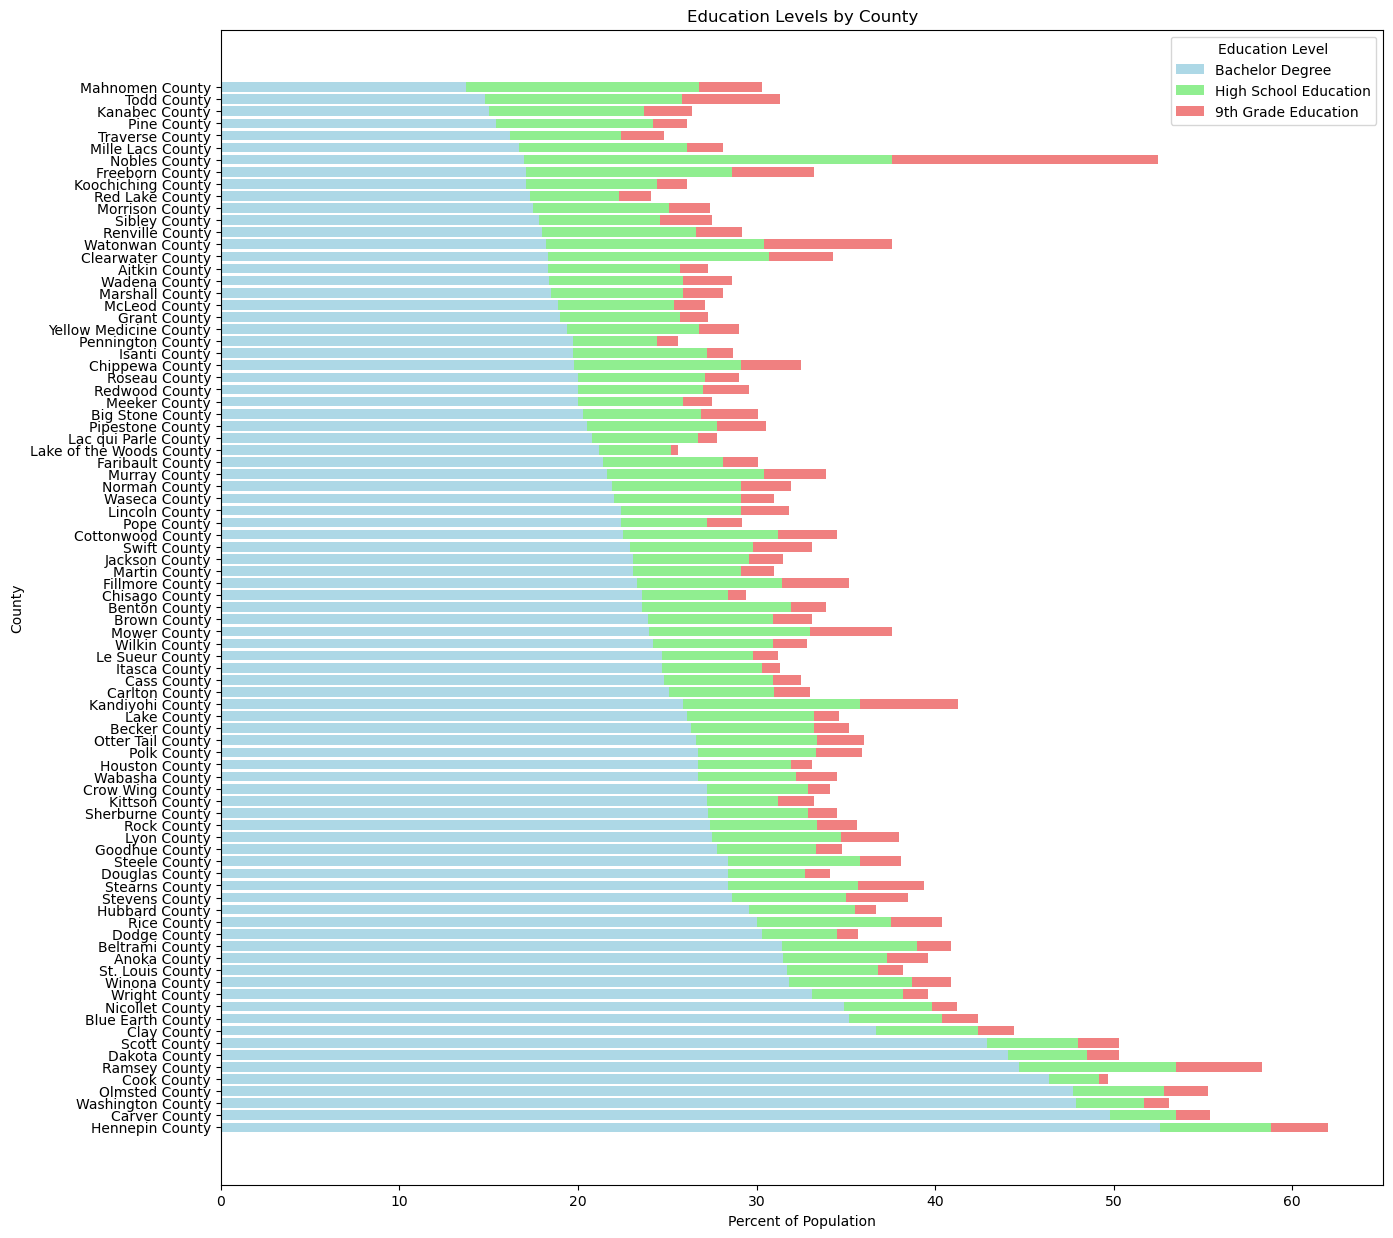

In [60]:
# Update column names in the code based on the actual column names
counties = merged_df['County']
bachelor_degrees = merged_df['Value Bachelor(Percent)']  # Check exact match
high_school_education = merged_df['Value High School(Percent)']  # Check exact match
ninth_grade_education = merged_df['Value 9th Grade(Percent)']  # Check exact match
merged_df.columns = merged_df.columns.str.strip()
# Plotting
plt.figure(figsize=(15, 15))

# Stacked bar chart
plt.barh(counties, bachelor_degrees, color='lightblue', label='Bachelor Degree')
plt.barh(counties, high_school_education, left=bachelor_degrees, color='lightgreen', label='High School Education')
plt.barh(counties, ninth_grade_education, left=bachelor_degrees + high_school_education, color='lightcoral', label='9th Grade Education')

# Adding labels and title
plt.xlabel('Percent of Population')
plt.ylabel('County')
plt.title('Education Levels by County')
plt.legend(title='Education Level')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top

# Show the plot
plt.show()

In [61]:
#display csv
df_census= pd.read_csv('./Education/Census Data.csv')
print("\nCensus Data:")
df_census


Census Data:


year  high_school_graduate  high_school_graduate_or_higher  \
0  2022                 64465                          206342   
1  2021                 62547                          204526   
2  2020                 61597                          202850   
3  2019                 62259                          199504   
4  2018                 62685                          197419   
5  2017                 62512                          194380   
6  2016                 62002                          191562   

   bachelors_degree  bachelors_degree_or_higher  population_25_years_and_over  
0             53045                       85218                        226274  
1             52805                       85037                        224580  
2             52164                       83701                        223058  
3             49937                       79816                        221478  
4             48235                       76923                        219830  
5             46262                       74103                        216921  
6             44778                       71900                        215015

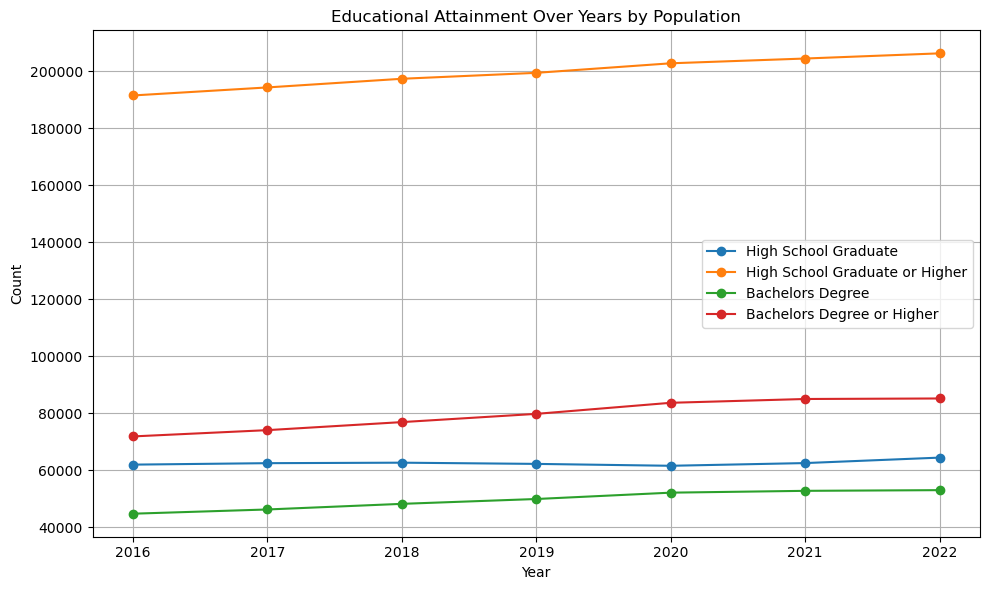

In [62]:
# Extract columns
years = df_census['year']
high_school_graduate = df_census['high_school_graduate']
high_school_grad_or_higher = df_census['high_school_graduate_or_higher']  # Correct column name
bachelors_degree = df_census['bachelors_degree']
bachelors_degree_or_higher = df_census['bachelors_degree_or_higher']

# Create the plot
plt.figure(figsize=(10, 6))

plt.plot(years, high_school_graduate, marker='o', label='High School Graduate')
plt.plot(years, high_school_grad_or_higher, marker='o', label='High School Graduate or Higher')
plt.plot(years, bachelors_degree, marker='o', label='Bachelors Degree')
plt.plot(years, bachelors_degree_or_higher, marker='o', label='Bachelors Degree or Higher')

# Adding titles and labels
plt.title('Educational Attainment Over Years by Population')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(years)

# Show the plot
plt.tight_layout()
plt.show()

In [63]:
# Calculate percentages
df_census['percent_high_school_graduate'] = (df_census['high_school_graduate'] / df_census['population_25_years_and_over']) * 100
df_census['percent_high_school_graduate_or_higher'] = (df_census['high_school_graduate_or_higher'] / df_census['population_25_years_and_over']) * 100
df_census['percent_bachelors_degree'] = (df_census['bachelors_degree'] / df_census['population_25_years_and_over']) * 100
df_census['percent_bachelors_degree_or_higher'] = (df_census['bachelors_degree_or_higher'] / df_census['population_25_years_and_over']) * 100

# Display the updated DataFrame with percentages
print("\nUpdated Census Data with Percentages:")
print(df_census[['year', 'percent_high_school_graduate', 'percent_high_school_graduate_or_higher',
                 'percent_bachelors_degree', 'percent_bachelors_degree_or_higher']])


Updated Census Data with Percentages:
   year  percent_high_school_graduate  percent_high_school_graduate_or_higher  \
0  2022                     28.489796                               91.191211   
1  2021                     27.850655                               91.070443   
2  2020                     27.614791                               90.940473   
3  2019                     28.110693                               90.078473   
4  2018                     28.515216                               89.805304   
5  2017                     28.817865                               89.608659   
6  2016                     28.836128                               89.092389   

   percent_bachelors_degree  percent_bachelors_degree_or_higher  
0                 23.442817                           37.661419  
1                 23.512779                           37.864903  
2                 23.385846                           37.524321  
3                 22.547160                     

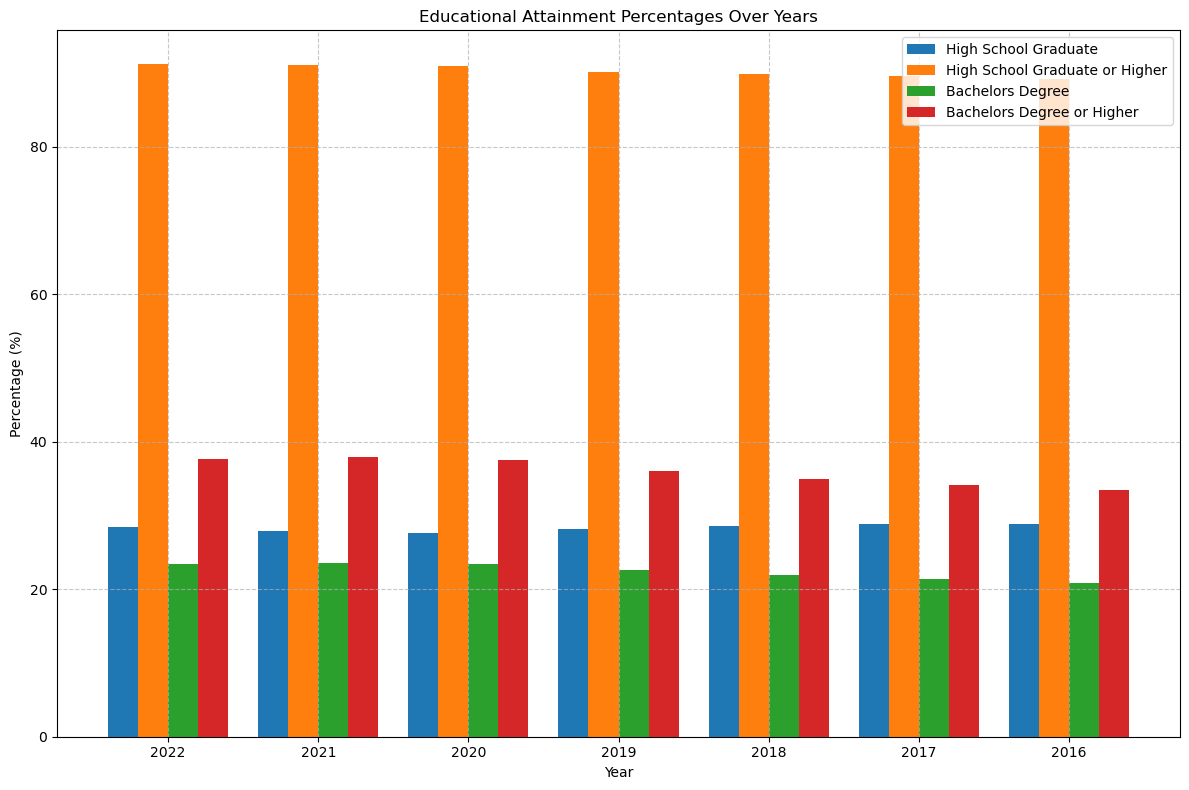

In [64]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Bar width and positions
bar_width = 0.2
index = range(len(df_census['year']))

# Plot bars for each category
plt.bar([i - 1.5 * bar_width for i in index], df_census['percent_high_school_graduate'], bar_width, label='High School Graduate')
plt.bar([i - 0.5 * bar_width for i in index], df_census['percent_high_school_graduate_or_higher'], bar_width, label='High School Graduate or Higher')
plt.bar([i + 0.5 * bar_width for i in index], df_census['percent_bachelors_degree'], bar_width, label='Bachelors Degree')
plt.bar([i + 1.5 * bar_width for i in index], df_census['percent_bachelors_degree_or_higher'], bar_width, label='Bachelors Degree or Higher')

# Adding titles and labels
plt.title('Educational Attainment Percentages Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(index, df_census['year'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [65]:
df_years= pd.read_csv('./Education/2019^02021.csv')
df_years.head()

states  high_school_or_equal_2019  bachelors_or_higher_2019  \
0     Alabama                     158761                     34996   
1      Alaska                      27173                      3121   
2     Arizona                     246748                     69933   
3    Arkansas                      97402                     25465   
4  California                    1151214                    427410   

   population_18-24_2019  high_school_or_equal_2021  bachelors_or_higher_2021  \
0                 457530                     170023                     42643   
1                  67738                      33691                      2377   
2                 694529                     244573                     71571   
3                 282336                     113873                     27533   
4                3683287                    1215035                    434774   

   population_18-24_2021  
0                 468727  
1                  67493  
2                 681735  
3                 284335  
4                3558188

In [66]:
# Correlation between high school or higher attainment and population of 18-24 year olds
correlation_high_school_population = df_years[['high_school_or_equal_2019', 'population_18-24_2019']].corr().iloc[0, 1]
correlation_bachelors_population = df_years[['bachelors_or_higher_2019', 'population_18-24_2019']].corr().iloc[0, 1]
correlation_high_school_population_2 = df_years[['high_school_or_equal_2021', 'population_18-24_2021']].corr().iloc[0, 1]
correlation_bachelors_population_2 = df_years[['bachelors_or_higher_2021', 'population_18-24_2021']].corr().iloc[0, 1]

print(f"Correlation between High School or Higher Attainment and Population 18-24 (2019): {correlation_high_school_population}")
print(f"Correlation between Bachelor's or Higher Attainment and Population 18-24 (2019): {correlation_bachelors_population}")
print(f"Correlation between High School or Higher Attainment and Population 18-24 (2021): {correlation_high_school_population_2}")
print(f"Correlation between Bachelor's or Higher Attainment and Population 18-24 (2021): {correlation_bachelors_population_2}")

Correlation between High School or Higher Attainment and Population 18-24 (2019): 0.9957595542855971
Correlation between Bachelor's or Higher Attainment and Population 18-24 (2019): 0.9568027950786185
Correlation between High School or Higher Attainment and Population 18-24 (2021): 0.996356135645669
Correlation between Bachelor's or Higher Attainment and Population 18-24 (2021): 0.9660516380532393


In [67]:
# Calculate percentages
df_years['hs_percent_2019'] = (df_years['high_school_or_equal_2019'] / df_years['population_18-24_2019']) * 100
df_years['bachelor_percent_2019'] = (df_years['bachelors_or_higher_2019'] / df_years['population_18-24_2019']) * 100
df_years['hs_percent_2021'] = (df_years['high_school_or_equal_2021'] / df_years['population_18-24_2021']) * 100
df_years['bachelor_percent_2021'] = (df_years['bachelors_or_higher_2021'] / df_years['population_18-24_2021']) * 100

# Display the DataFrame with the calculated percentages
print(df_years[['states', 'hs_percent_2019', 'bachelor_percent_2019', 'hs_percent_2021', 'bachelor_percent_2021']])

# Optionally, save the results to a new CSV file
df_years.to_csv('education_percentages.csv', index=False)

            states  hs_percent_2019  bachelor_percent_2019  hs_percent_2021  \
0          Alabama        34.699583               7.648897        36.273353   
1           Alaska        40.114854               4.607458        49.917769   
2          Arizona        35.527386              10.069126        35.875083   
3         Arkansas        34.498612               9.019395        40.048886   
4       California        31.255072              11.604037        34.147577   
5         Colorado        31.841440              13.725442        35.154390   
6      Connecticut        29.925169              16.527597        30.853649   
7         Delaware        32.559662              10.013696        36.193785   
8          Florida        32.133732              10.647484        33.894568   
9          Georgia        34.366914               9.994759        37.380065   
10          Hawaii        43.246763               8.222355        43.238663   
11           Idaho        37.512372               7.

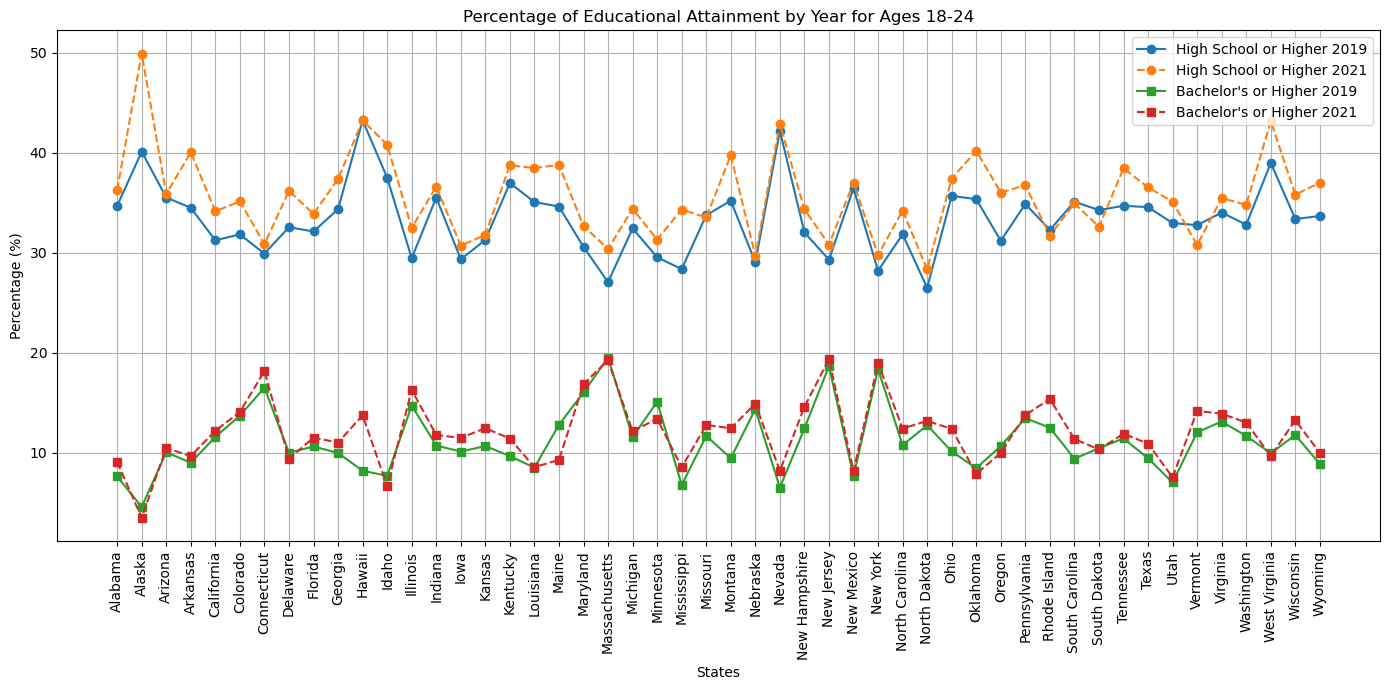

In [68]:
# Plotting the line graphs
plt.figure(figsize=(14, 7))

# Line plot for high school or higher percentage
plt.plot(df_years['states'], df_years['hs_percent_2019'], marker='o', label='High School or Higher 2019')
plt.plot(df_years['states'], df_years['hs_percent_2021'], marker='o', linestyle='--', label='High School or Higher 2021')

# Line plot for bachelor's or higher percentage
plt.plot(df_years['states'], df_years['bachelor_percent_2019'], marker='s', label='Bachelor\'s or Higher 2019')
plt.plot(df_years['states'], df_years['bachelor_percent_2021'], marker='s', linestyle='--', label='Bachelor\'s or Higher 2021')

# Adding labels and title
plt.xlabel('States')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Educational Attainment by Year for Ages 18-24')
plt.xticks(rotation=90)  # Rotate state names for better visibility
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


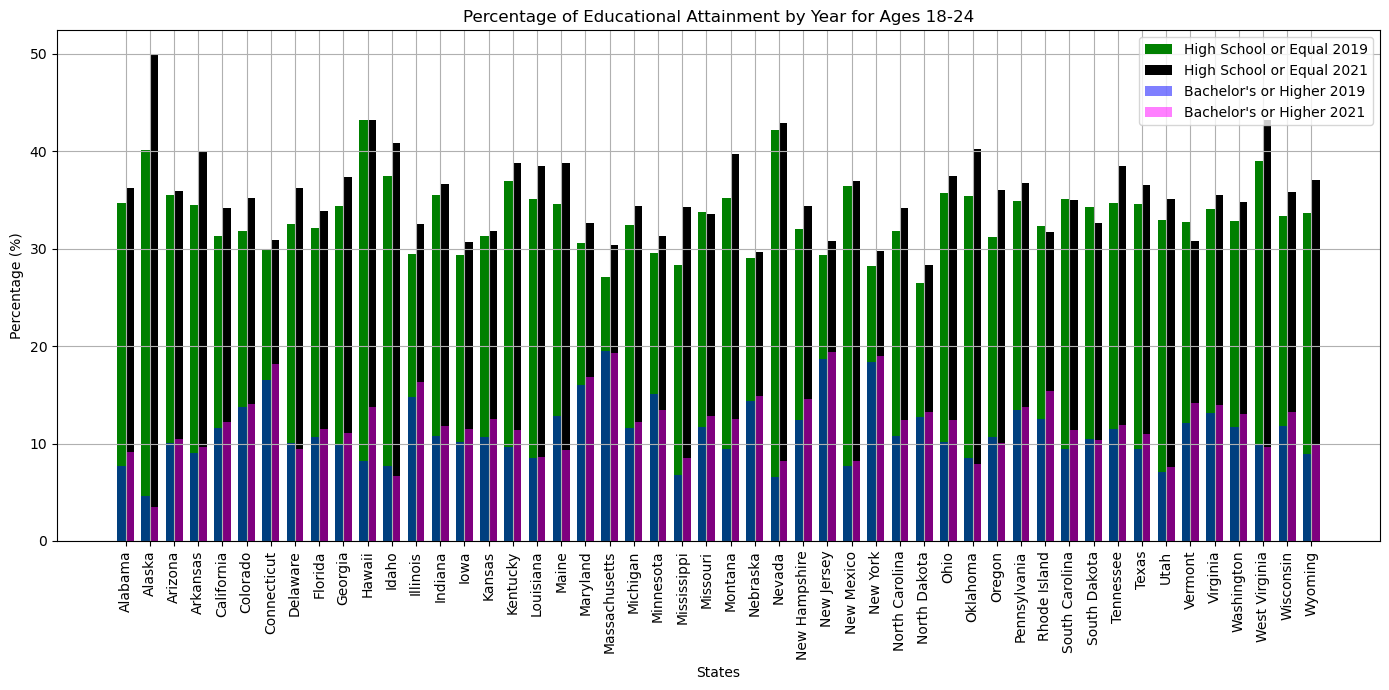

In [69]:
# Create a figure and axis
plt.figure(figsize=(14, 7))

# Define the position of bars on the x-axis
bar_width = 0.35
index = np.arange(len(df_years['states']))

# Bar plot for high school or higher percentage
plt.bar(index - bar_width/2, df_years['hs_percent_2019'], bar_width, label='High School or Equal 2019', color= 'green')
plt.bar(index + bar_width/2, df_years['hs_percent_2021'], bar_width, label='High School or Equal 2021', color= 'black')

# Bar plot for bachelor's or higher percentage
plt.bar(index - bar_width/2, df_years['bachelor_percent_2019'], bar_width, label='Bachelor\'s or Higher 2019', alpha=0.5, color= 'blue')
plt.bar(index + bar_width/2, df_years['bachelor_percent_2021'], bar_width, label='Bachelor\'s or Higher 2021', alpha=0.5, color= 'magenta')

# Adding labels and title
plt.xlabel('States')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Educational Attainment by Year for Ages 18-24')
plt.xticks(index, df_years['states'], rotation=90)  # Rotate state names for better visibility
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

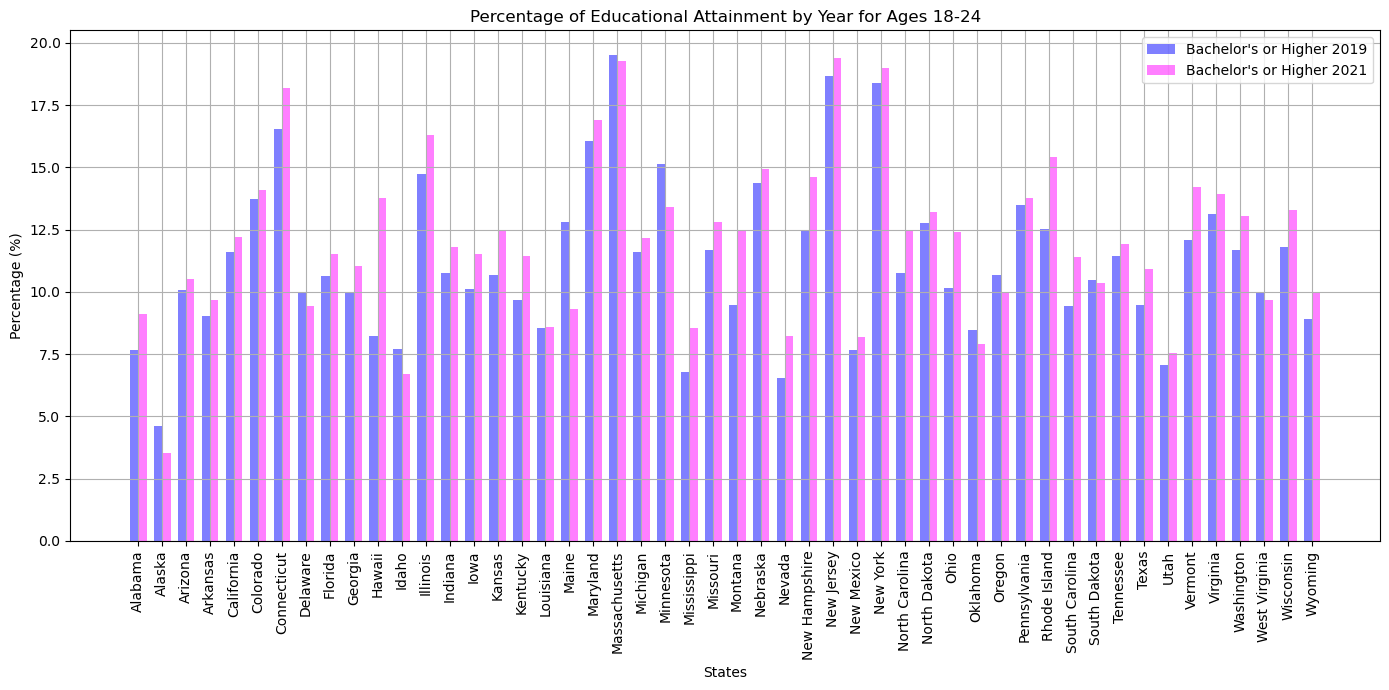

In [70]:
# Create a figure and axis
plt.figure(figsize=(14, 7))

# Define the position of bars on the x-axis
bar_width = 0.35
index = np.arange(len(df_years['states']))

# Bar plot for bachelor's or higher percentage
plt.bar(index - bar_width/2, df_years['bachelor_percent_2019'], bar_width, label='Bachelor\'s or Higher 2019', alpha=0.5, color= 'blue')
plt.bar(index + bar_width/2, df_years['bachelor_percent_2021'], bar_width, label='Bachelor\'s or Higher 2021', alpha=0.5, color= 'magenta')

# Adding labels and title
plt.xlabel('States')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Educational Attainment by Year for Ages 18-24')
plt.xticks(index, df_years['states'], rotation=90)  # Rotate state names for better visibility
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

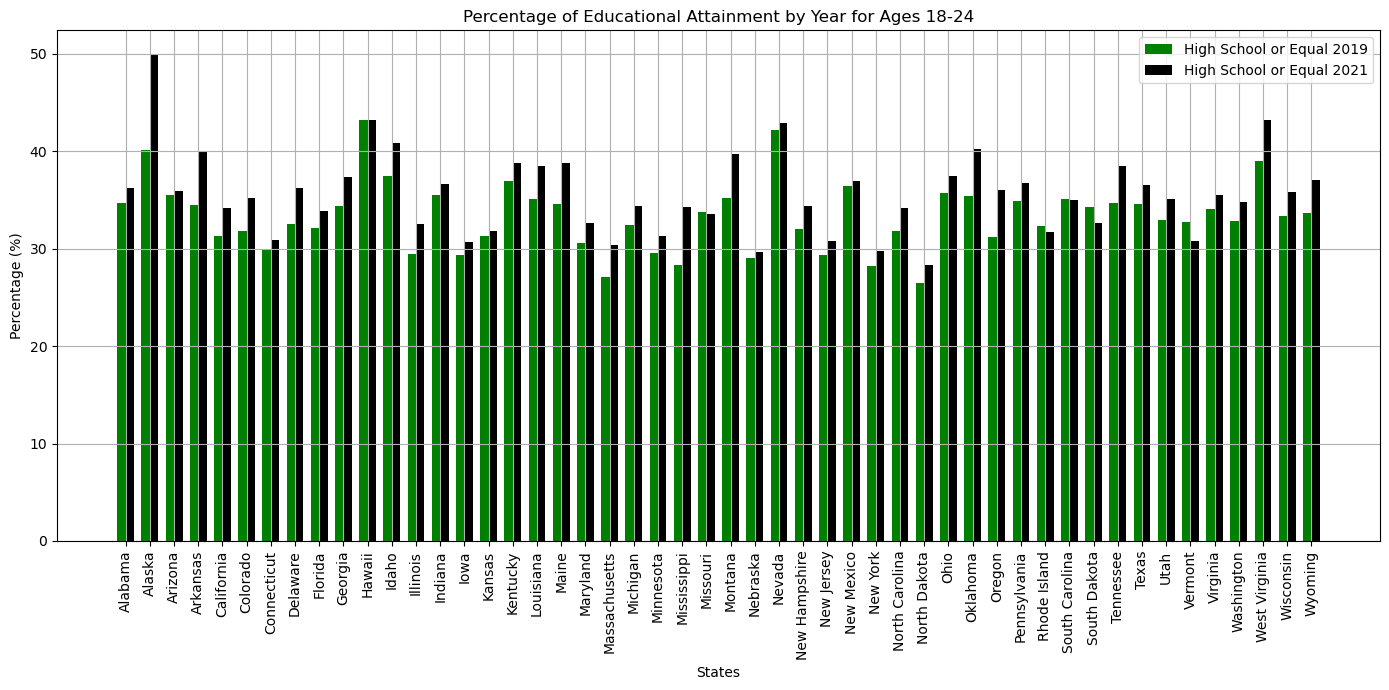

In [71]:
# Create a figure and axis
plt.figure(figsize=(14, 7))

# Define the position of bars on the x-axis
bar_width = 0.35
index = np.arange(len(df_years['states']))

# Bar plot for high school or higher percentage
plt.bar(index - bar_width/2, df_years['hs_percent_2019'], bar_width, label='High School or Equal 2019', color= 'green')
plt.bar(index + bar_width/2, df_years['hs_percent_2021'], bar_width, label='High School or Equal 2021', color= 'black')

# Adding labels and title
plt.xlabel('States')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Educational Attainment by Year for Ages 18-24')
plt.xticks(index, df_years['states'], rotation=90)  # Rotate state names for better visibility
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [74]:
state_gdp_df = pd.read_csv(file2)
clean_state_gdp_df = state_gdp_df.loc[state_gdp_df["LineCode"] == 1]
clean_state_gdp_df2 = clean_state_gdp_df[clean_state_gdp_df["GeoName"] != "United States"].reset_index(drop = True)
clean_state_gdp_df3 = clean_state_gdp_df2.drop(clean_state_gdp_df2.tail(8).index)
clean_state_gdp_rename_df = clean_state_gdp_df3.rename(columns = {"2016" : "2016 RGDP", "2017" : "2017 RGDP", "2018" : "2018 RGDP","2019": "2019 RGDP", "2020" : "2020 RGDP" , "2021" : "2021 RGDP", "2022": "2022 RGDP", "2023" : "2023 RGDP", "GeoName" : "Province_State"})
state_gdp_df_clean = clean_state_gdp_rename_df.drop(columns = {"GeoFips", "LineCode", "Description"})

In [75]:
population_df = pd.read_csv(file4)
clean_pop_df = population_df.loc[population_df["Country_Region"] == "US"].reset_index(drop = True)
clean_pop_df2 = clean_pop_df.loc[clean_pop_df["FIPS"].between(1,56)].reset_index(drop = True)
clean_final_pop_df = clean_pop_df2.drop(columns = {"UID", "iso2", "iso3", "code3", "FIPS", "Admin2", "Country_Region", "Combined_Key"})

In [76]:
Start2020 = covid_df.groupby(["Province_State"])["1/22/20"].min()
End2020 = covid_df.groupby(["Province_State"])["12/31/20"].sum()
End2021 = covid_df.groupby(["Province_State"])["12/31/21"].sum()
End2022 = covid_df.groupby(["Province_State"])["12/31/22"].sum()
End2023 = covid_df.groupby(["Province_State"])["3/9/23"].sum()

average_infections_state = pd.DataFrame({"Infections as of 1/22/2020": Start2020,
                                     "Infections as of 12/31/2020": End2020,
                                     "Infections as of 12/31/2021": End2021,
                                     "Infections as of 12/31/2022": End2022,
                                     "Infections as of 3/9/2023": End2023})

In [77]:
study_data_partial = pd.merge(average_infections_state, clean_final_pop_df, on=["Province_State"])
study_data_full = pd.merge(study_data_partial, state_gdp_df_clean, on=["Province_State"])

In [78]:
gdf = gpd.read_file('./Data/cb_2018_us_state_500k')
clean1_gdf = gdf.rename(columns = {"NAME" : "Province_State"})
clean_gdf = clean1_gdf.drop(columns = {"STATEFP", "STATENS", "AFFGEOID", "GEOID", "STUSPS", "LSAD", "ALAND", "AWATER"})

In [79]:
final_df = clean_gdf.merge(study_data_full, on=["Province_State"])
final_df["2020 Infections per 100k"] = ((final_df["Infections as of 12/31/2020"]/final_df["Population"])*100000)
final_df["2021 Infections per 100k"] = (((final_df["Infections as of 12/31/2021"] - final_df["Infections as of 12/31/2020"])/final_df["Population"])*100000)
final_df["2022 Infections per 100k"] = (((final_df["Infections as of 12/31/2022"] - final_df["Infections as of 12/31/2021"])/final_df["Population"])*100000)
final_df["03.09.2023 Infections per 100k"] = (((final_df["Infections as of 3/9/2023"] - final_df["Infections as of 12/31/2022"])/final_df["Population"])*100000)

c:\Users\micah\anaconda3\envs\dev\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\micah\AppData\Local\Temp\ipykernel_12848\1528356851.py:70: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  hawaii.clip(hawaiipolygon).plot(column=variable, color=hawaii['value_determined_color'], linewidth=0.8,ax=hawaiiaxis, edgecolor='0.8')


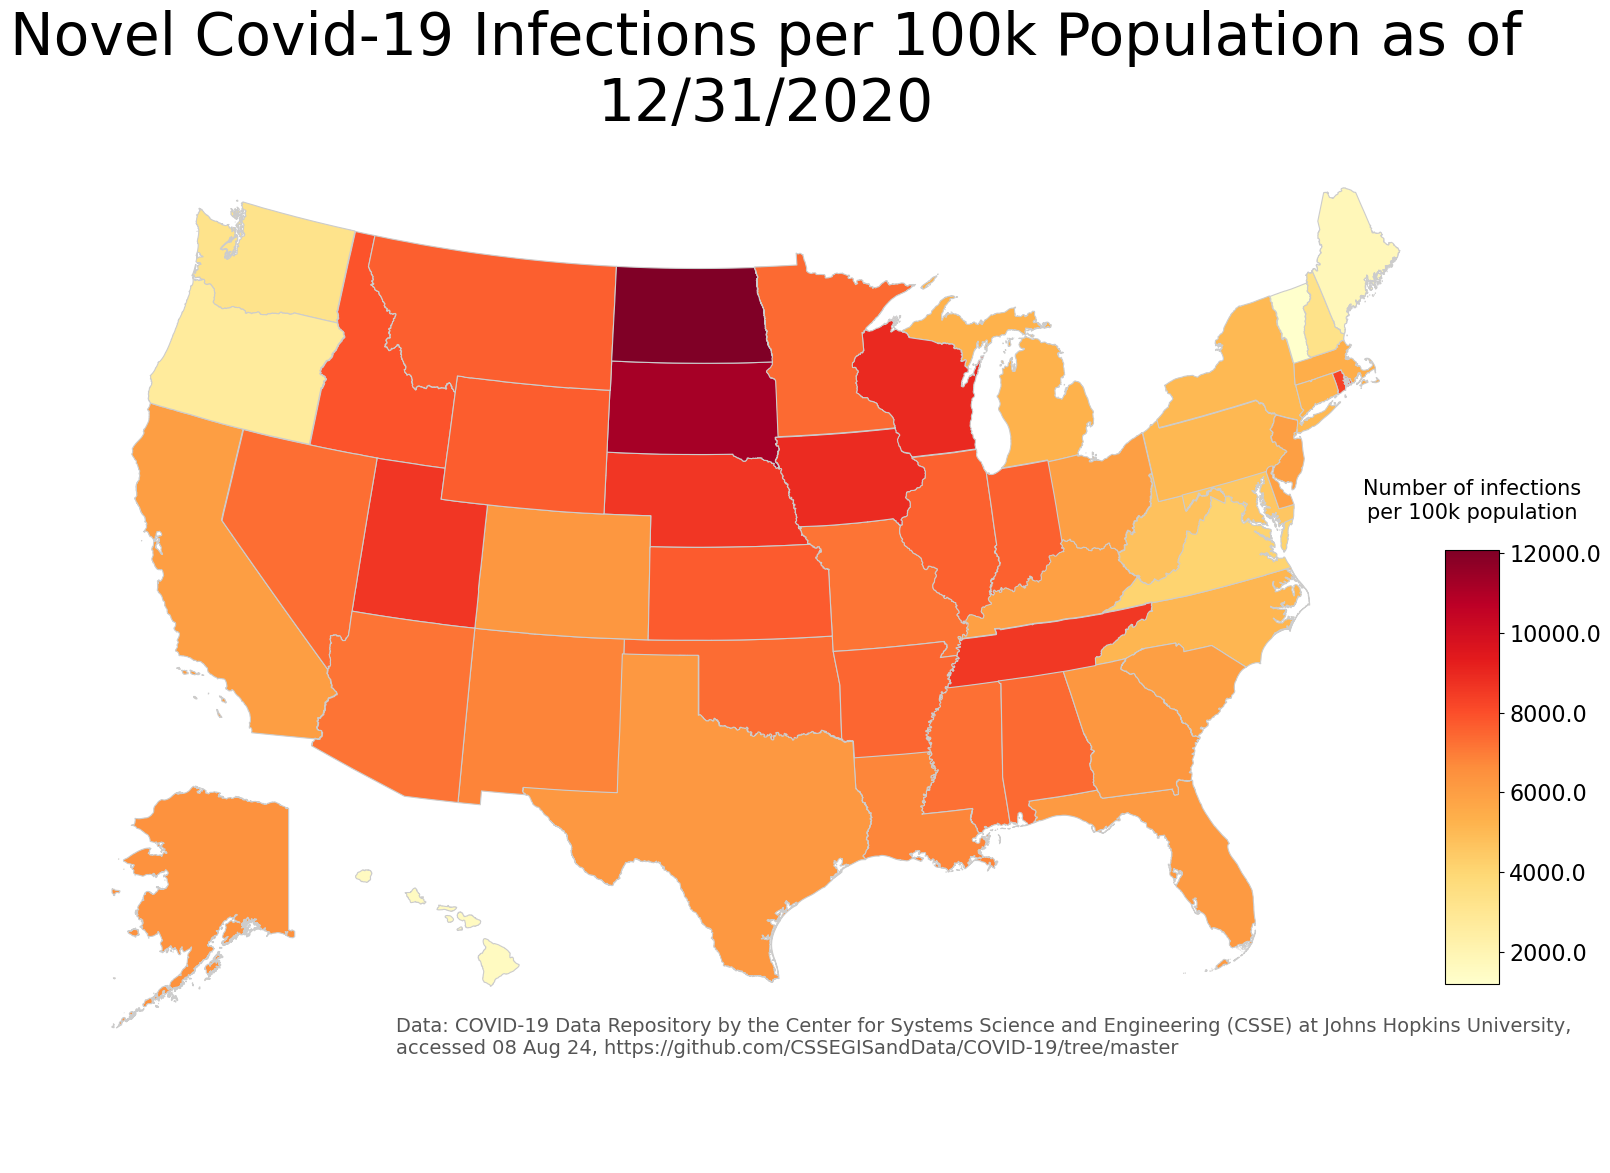

In [80]:
#The variable column that will be visualized
variable = '2020 Infections per 100k'

def makeColorColumn(final_df,variable,vmin,vmax):
    #Creates a column of assigned colors
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrRd)
    final_df['value_determined_color'] = final_df[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return final_df

#Setting the range and bounds for the colorbar
vmin, vmax = final_df["2020 Infections per 100k"].min(), final_df["2020 Infections per 100k"].max()
colormap = "YlOrRd"
final_df = makeColorColumn(final_df,variable,vmin,vmax)

#Creating a dataframe that would hold the ESPG code which will format the visual
visframe = final_df.to_crs({'init':'epsg:2163'})



#Matplotlib, creating the figure
fig, ax = plt.subplots(1, figsize=(18, 14))
#Removing the axis box from around the visualization
ax.axis('off')

#Title of the graph
ax.set_title('Novel Covid-19 Infections per 100k Population as of\n12/31/2020', fontdict={'fontsize': '42', 'fontweight' : '1'})

#Creating a legend for the colorbar
fig = ax.get_figure()
#Adding in the colorbar axis
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

cbax.set_title('Number of infections\nper 100k population\n', fontdict={'fontsize': '15', 'fontweight' : '0'})

#Adding in a color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
#Reformatting tick labels
sm._A = []
comma_fmt = FuncFormatter(lambda x, p: format(x))
fig.colorbar(sm, cax=cbax, format=comma_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
#Annotating the link to the data
ax.annotate("Data: COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,\naccessed 08 Aug 24, https://github.com/CSSEGISandData/COVID-19/tree/master", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')

#Creating the map
for row in visframe.itertuples():
    if row.Province_State not in ['Alaska','Hawaii']:
        vf = visframe[visframe.Province_State==row.Province_State]
        c = final_df[final_df.Province_State==row.Province_State][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')

#Adding in Alaska
alaskaaxis = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
alaskaaxis.axis('off')
#Polygon for capturing the Aleutian Islands
alaskapolygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska = final_df[final_df.Province_State=='Alaska']
alaska.clip(alaskapolygon).plot(color=final_df[final_df.Province_State=='Alaska'].value_determined_color, linewidth=0.8,ax=alaskaaxis, edgecolor='0.8')


#Adding in Hawii to the bottom left corner
hawaiiaxis = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hawaiiaxis.axis('off')
#Polygon for capturing the entirety of Hawaii
hawaiipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii = final_df[final_df.Province_State=='Hawaii']
hawaii.clip(hawaiipolygon).plot(column=variable, color=hawaii['value_determined_color'], linewidth=0.8,ax=hawaiiaxis, edgecolor='0.8')


fig.savefig('./Data/2020Infections.png',dpi=400, bbox_inches="tight")

c:\Users\micah\anaconda3\envs\dev\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\micah\AppData\Local\Temp\ipykernel_12848\1639961429.py:70: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  hawaii.clip(hawaiipolygon).plot(column=variable, color=hawaii['value_determined_color'], linewidth=0.8,ax=hawaiiaxis, edgecolor='0.8')


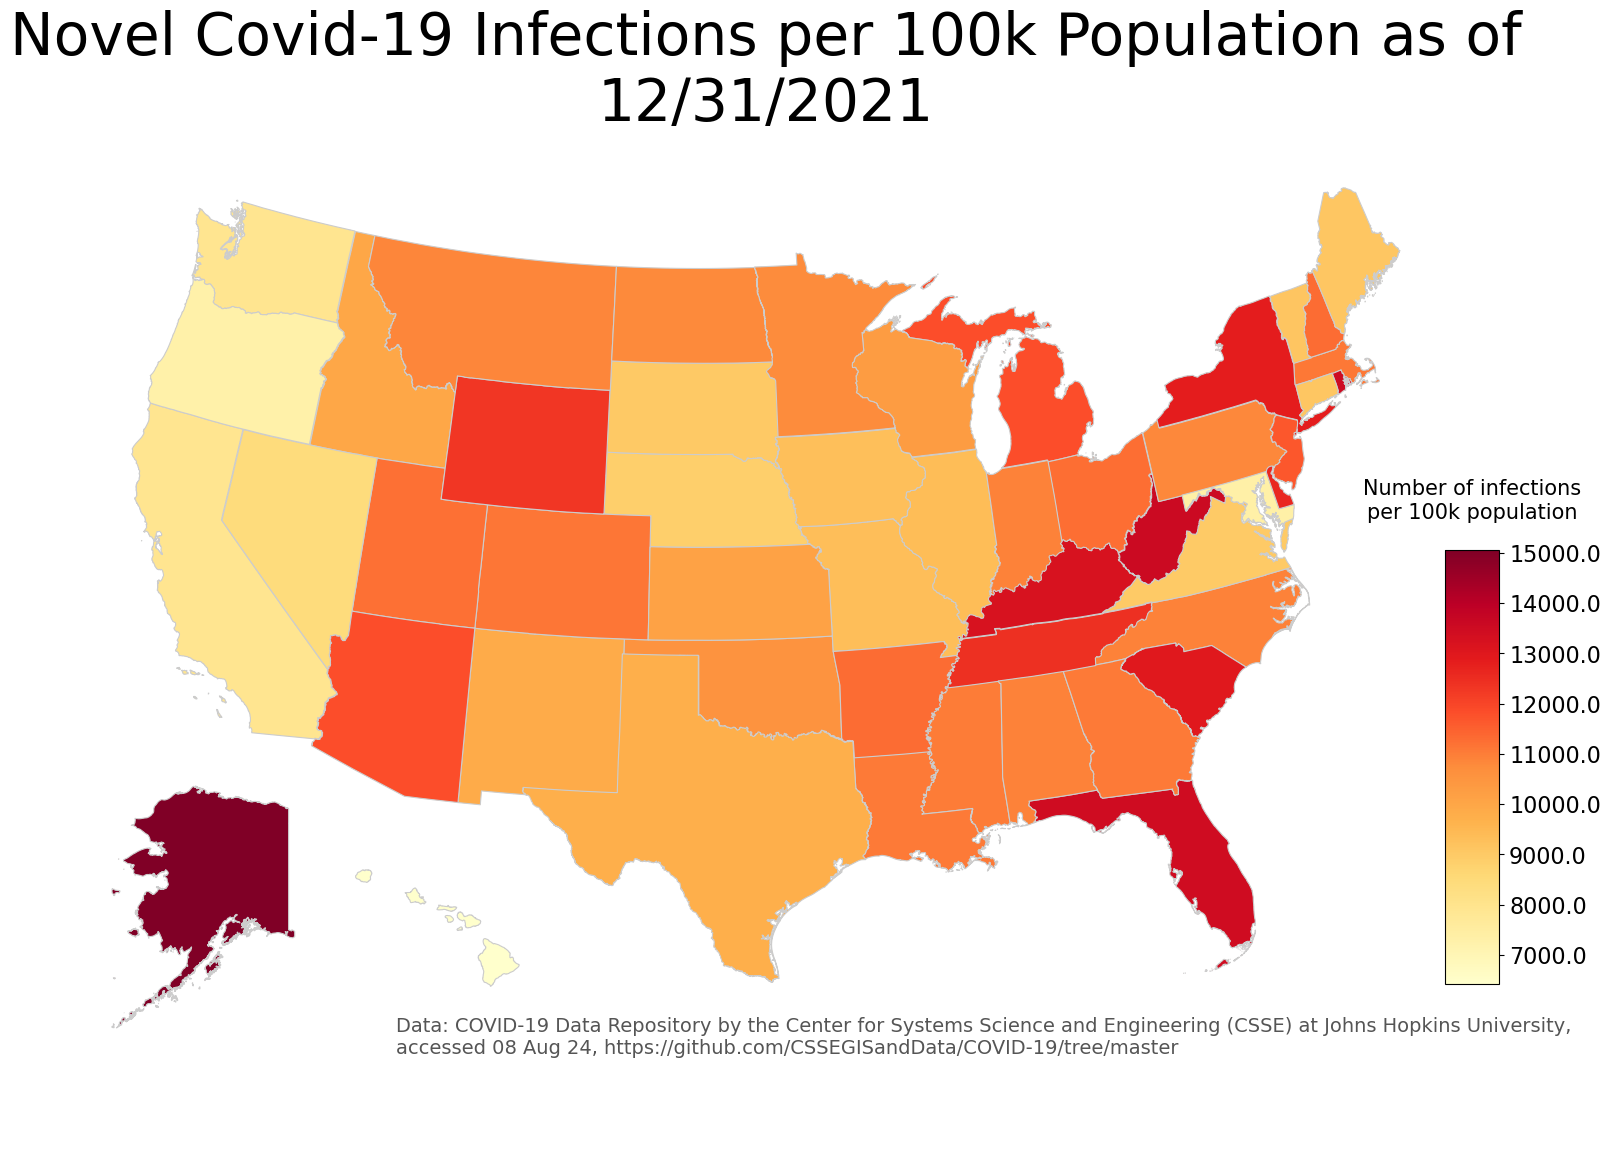

In [81]:
#The variable column that will be visualized
variable = '2021 Infections per 100k'

def makeColorColumn(final_df,variable,vmin,vmax):
    #Creates a column of assigned colors
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrRd)
    final_df['value_determined_color'] = final_df[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return final_df

#Setting the range and bounds for the colorbar
vmin, vmax = final_df["2021 Infections per 100k"].min(), final_df["2021 Infections per 100k"].max()
colormap = "YlOrRd"
final_df = makeColorColumn(final_df,variable,vmin,vmax)

#Creating a dataframe that would hold the ESPG code which will format the visual
visframe = final_df.to_crs({'init':'epsg:2163'})



#Matplotlib, creating the figure
fig, ax = plt.subplots(1, figsize=(18, 14))
#Removing the axis box from around the visualization
ax.axis('off')

#Title of the graph
ax.set_title('Novel Covid-19 Infections per 100k Population as of\n12/31/2021', fontdict={'fontsize': '42', 'fontweight' : '1'})

#Creating a legend for the colorbar
fig = ax.get_figure()
#Adding in the colorbar axis
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

cbax.set_title('Number of infections\nper 100k population\n', fontdict={'fontsize': '15', 'fontweight' : '0'})

#Adding in a color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
#Reformatting tick labels
sm._A = []
comma_fmt = FuncFormatter(lambda x, p: format(x))
fig.colorbar(sm, cax=cbax, format=comma_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
#Annotating the link to the data
ax.annotate("Data: COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,\naccessed 08 Aug 24, https://github.com/CSSEGISandData/COVID-19/tree/master", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')

#Creating the map
for row in visframe.itertuples():
    if row.Province_State not in ['Alaska','Hawaii']:
        vf = visframe[visframe.Province_State==row.Province_State]
        c = final_df[final_df.Province_State==row.Province_State][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')

#Adding in Alaska
alaskaaxis = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
alaskaaxis.axis('off')
#Polygon for capturing the Aleutian Islands
alaskapolygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska = final_df[final_df.Province_State=='Alaska']
alaska.clip(alaskapolygon).plot(color=final_df[final_df.Province_State=='Alaska'].value_determined_color, linewidth=0.8,ax=alaskaaxis, edgecolor='0.8')


#Adding in Hawii to the bottom left corner
hawaiiaxis = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hawaiiaxis.axis('off')
#Polygon for capturing the entirety of Hawaii
hawaiipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii = final_df[final_df.Province_State=='Hawaii']
hawaii.clip(hawaiipolygon).plot(column=variable, color=hawaii['value_determined_color'], linewidth=0.8,ax=hawaiiaxis, edgecolor='0.8')


fig.savefig('./Data/2021Infections.png',dpi=400, bbox_inches="tight")

c:\Users\micah\anaconda3\envs\dev\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\micah\AppData\Local\Temp\ipykernel_12848\3371119067.py:70: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  hawaii.clip(hawaiipolygon).plot(column=variable, color=hawaii['value_determined_color'], linewidth=0.8,ax=hawaiiaxis, edgecolor='0.8')


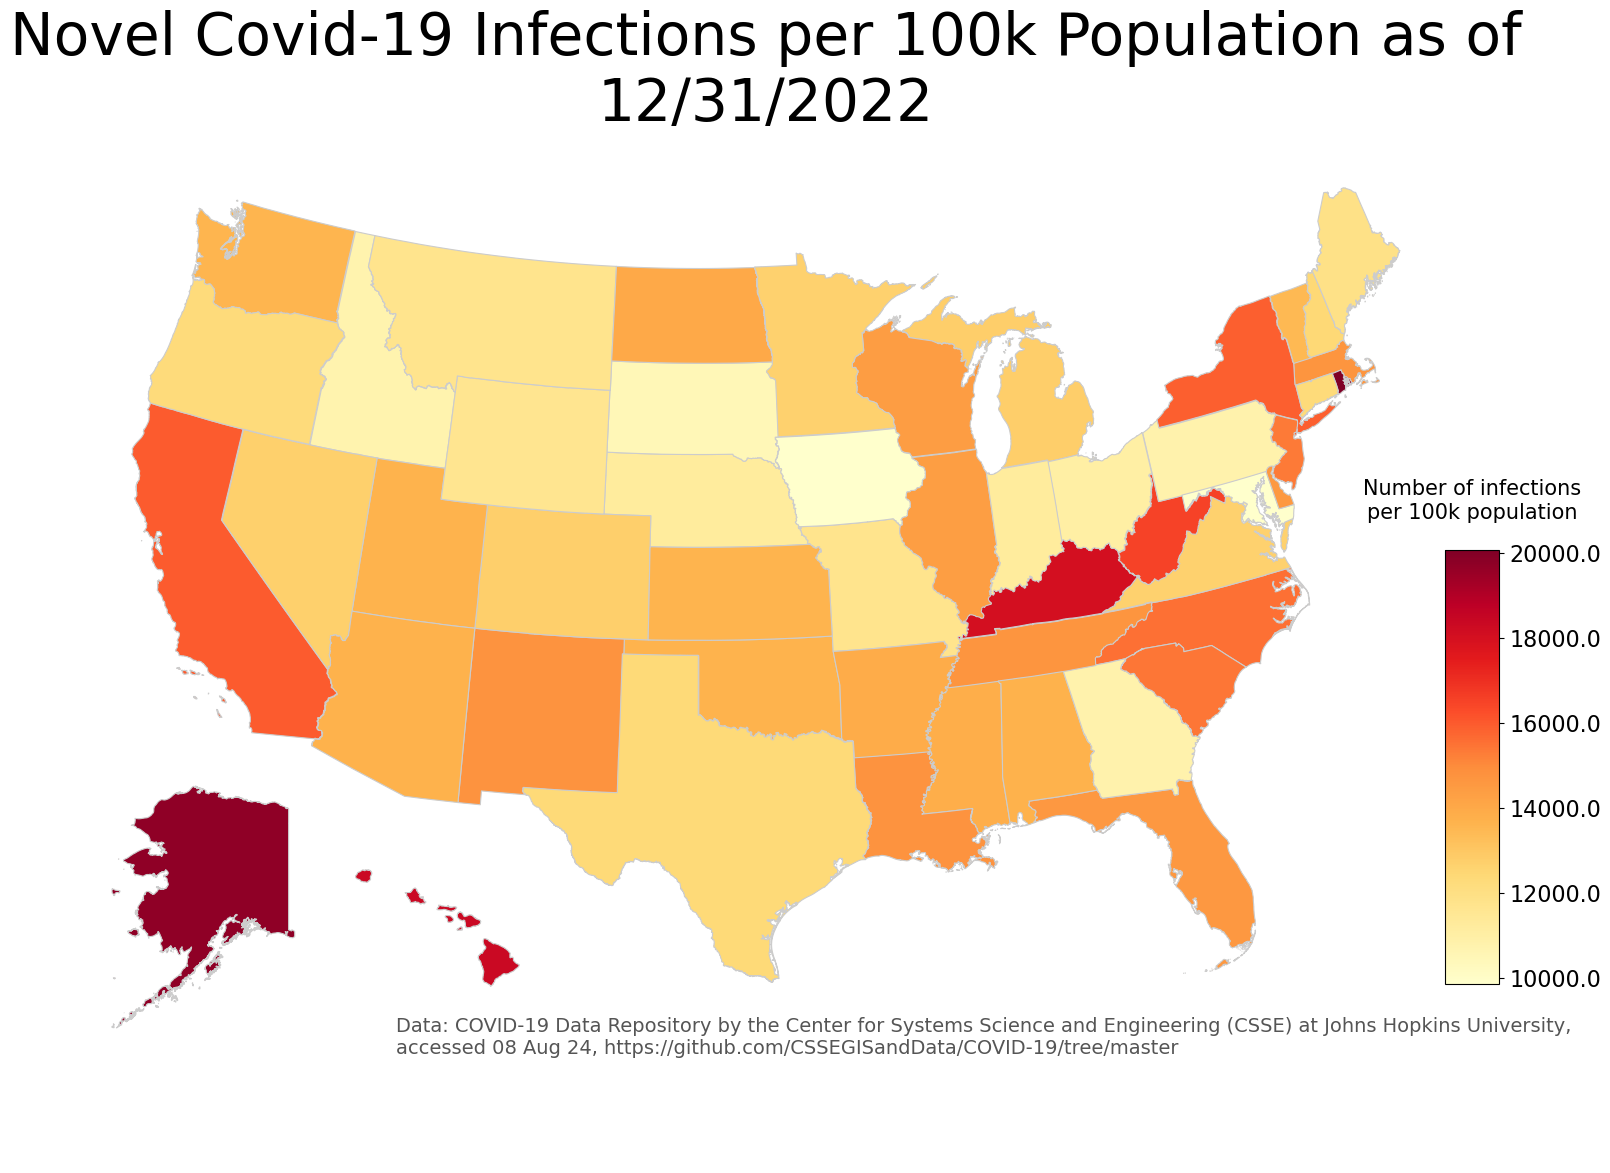

In [82]:
#The variable column that will be visualized
variable = '2022 Infections per 100k'

def makeColorColumn(final_df,variable,vmin,vmax):
    #Creates a column of assigned colors
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrRd)
    final_df['value_determined_color'] = final_df[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return final_df

#Setting the range and bounds for the colorbar
vmin, vmax = final_df["2022 Infections per 100k"].min(), final_df["2022 Infections per 100k"].max()
colormap = "YlOrRd"
final_df = makeColorColumn(final_df,variable,vmin,vmax)

#Creating a dataframe that would hold the ESPG code which will format the visual
visframe = final_df.to_crs({'init':'epsg:2163'})



#Matplotlib, creating the figure
fig, ax = plt.subplots(1, figsize=(18, 14))
#Removing the axis box from around the visualization
ax.axis('off')

#Title of the graph
ax.set_title('Novel Covid-19 Infections per 100k Population as of\n12/31/2022', fontdict={'fontsize': '42', 'fontweight' : '1'})

#Creating a legend for the colorbar
fig = ax.get_figure()
#Adding in the colorbar axis
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

cbax.set_title('Number of infections\nper 100k population\n', fontdict={'fontsize': '15', 'fontweight' : '0'})

#Adding in a color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
#Reformatting tick labels
sm._A = []
comma_fmt = FuncFormatter(lambda x, p: format(x))
fig.colorbar(sm, cax=cbax, format=comma_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
#Annotating the link to the data
ax.annotate("Data: COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,\naccessed 08 Aug 24, https://github.com/CSSEGISandData/COVID-19/tree/master", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')

#Creating the map
for row in visframe.itertuples():
    if row.Province_State not in ['Alaska','Hawaii']:
        vf = visframe[visframe.Province_State==row.Province_State]
        c = final_df[final_df.Province_State==row.Province_State][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')

#Adding in Alaska
alaskaaxis = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
alaskaaxis.axis('off')
#Polygon for capturing the Aleutian Islands
alaskapolygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska = final_df[final_df.Province_State=='Alaska']
alaska.clip(alaskapolygon).plot(color=final_df[final_df.Province_State=='Alaska'].value_determined_color, linewidth=0.8,ax=alaskaaxis, edgecolor='0.8')


#Adding in Hawii to the bottom left corner
hawaiiaxis = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hawaiiaxis.axis('off')
#Polygon for capturing the entirety of Hawaii
hawaiipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii = final_df[final_df.Province_State=='Hawaii']
hawaii.clip(hawaiipolygon).plot(column=variable, color=hawaii['value_determined_color'], linewidth=0.8,ax=hawaiiaxis, edgecolor='0.8')


fig.savefig('./Data/2022Infections.png',dpi=400, bbox_inches="tight")

c:\Users\micah\anaconda3\envs\dev\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\micah\AppData\Local\Temp\ipykernel_12848\1920429498.py:70: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  hawaii.clip(hawaiipolygon).plot(column=variable, color=hawaii['value_determined_color'], linewidth=0.8,ax=hawaiiaxis, edgecolor='0.8')


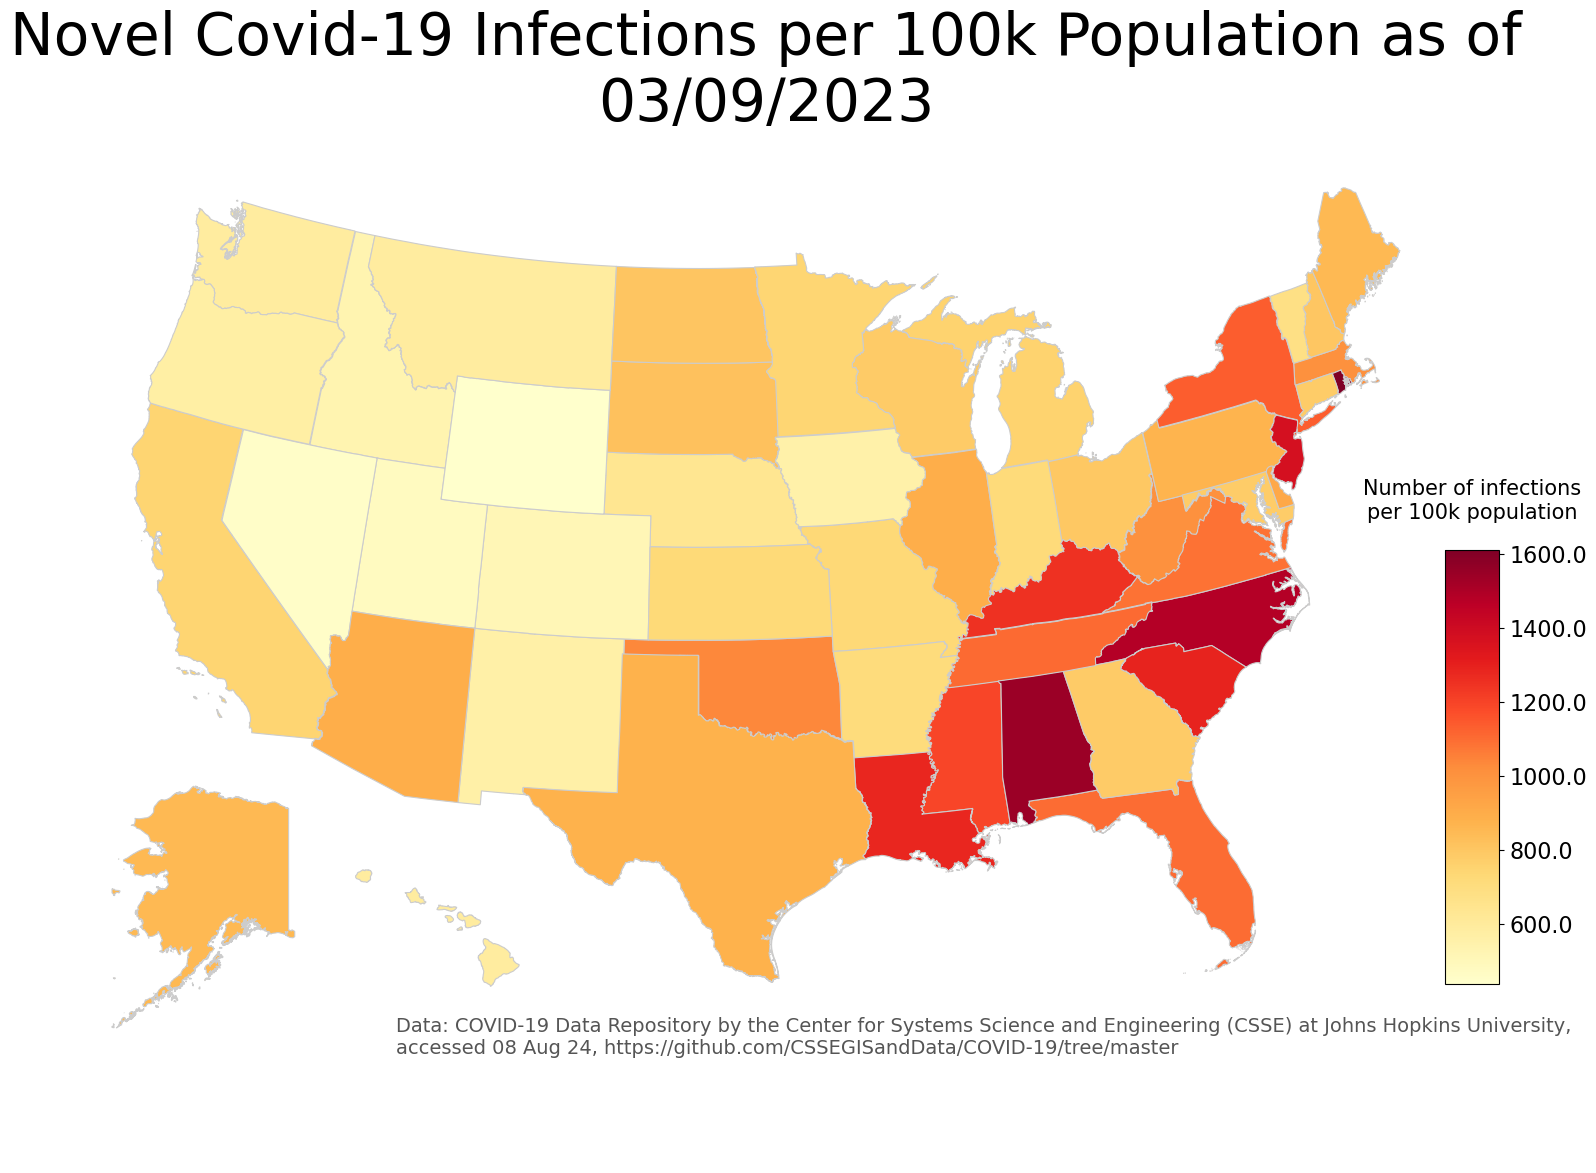

In [83]:
#The variable column that will be visualized
variable = '03.09.2023 Infections per 100k'

def makeColorColumn(final_df,variable,vmin,vmax):
    #Creates a column of assigned colors
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrRd)
    final_df['value_determined_color'] = final_df[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return final_df

#Setting the range and bounds for the colorbar
vmin, vmax = final_df["03.09.2023 Infections per 100k"].min(), final_df["03.09.2023 Infections per 100k"].max()
colormap = "YlOrRd"
final_df = makeColorColumn(final_df,variable,vmin,vmax)

#Creating a dataframe that would hold the ESPG code which will format the visual
visframe = final_df.to_crs({'init':'epsg:2163'})



#Matplotlib, creating the figure
fig, ax = plt.subplots(1, figsize=(18, 14))
#Removing the axis box from around the visualization
ax.axis('off')

#Title of the graph
ax.set_title('Novel Covid-19 Infections per 100k Population as of\n03/09/2023', fontdict={'fontsize': '42', 'fontweight' : '1'})

#Creating a legend for the colorbar
fig = ax.get_figure()
#Adding in the colorbar axis
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

cbax.set_title('Number of infections\nper 100k population\n', fontdict={'fontsize': '15', 'fontweight' : '0'})

#Adding in a color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
#Reformatting tick labels
sm._A = []
comma_fmt = FuncFormatter(lambda x, p: format(x))
fig.colorbar(sm, cax=cbax, format=comma_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
#Annotating the link to the data
ax.annotate("Data: COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,\naccessed 08 Aug 24, https://github.com/CSSEGISandData/COVID-19/tree/master", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')

#Creating the map
for row in visframe.itertuples():
    if row.Province_State not in ['Alaska','Hawaii']:
        vf = visframe[visframe.Province_State==row.Province_State]
        c = final_df[final_df.Province_State==row.Province_State][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')

#Adding in Alaska
alaskaaxis = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
alaskaaxis.axis('off')
#Polygon for capturing the Aleutian Islands
alaskapolygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska = final_df[final_df.Province_State=='Alaska']
alaska.clip(alaskapolygon).plot(color=final_df[final_df.Province_State=='Alaska'].value_determined_color, linewidth=0.8,ax=alaskaaxis, edgecolor='0.8')


#Adding in Hawii to the bottom left corner
hawaiiaxis = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hawaiiaxis.axis('off')
#Polygon for capturing the entirety of Hawaii
hawaiipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii = final_df[final_df.Province_State=='Hawaii']
hawaii.clip(hawaiipolygon).plot(column=variable, color=hawaii['value_determined_color'], linewidth=0.8,ax=hawaiiaxis, edgecolor='0.8')


fig.savefig('./Data/2023Infections.png',dpi=400, bbox_inches="tight")

c:\Users\micah\anaconda3\envs\dev\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\micah\AppData\Local\Temp\ipykernel_12848\3501407061.py:70: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  hawaii.clip(hawaiipolygon).plot(column=variable, color=hawaii['value_determined_color'], linewidth=0.8,ax=hawaiiaxis, edgecolor='0.8')


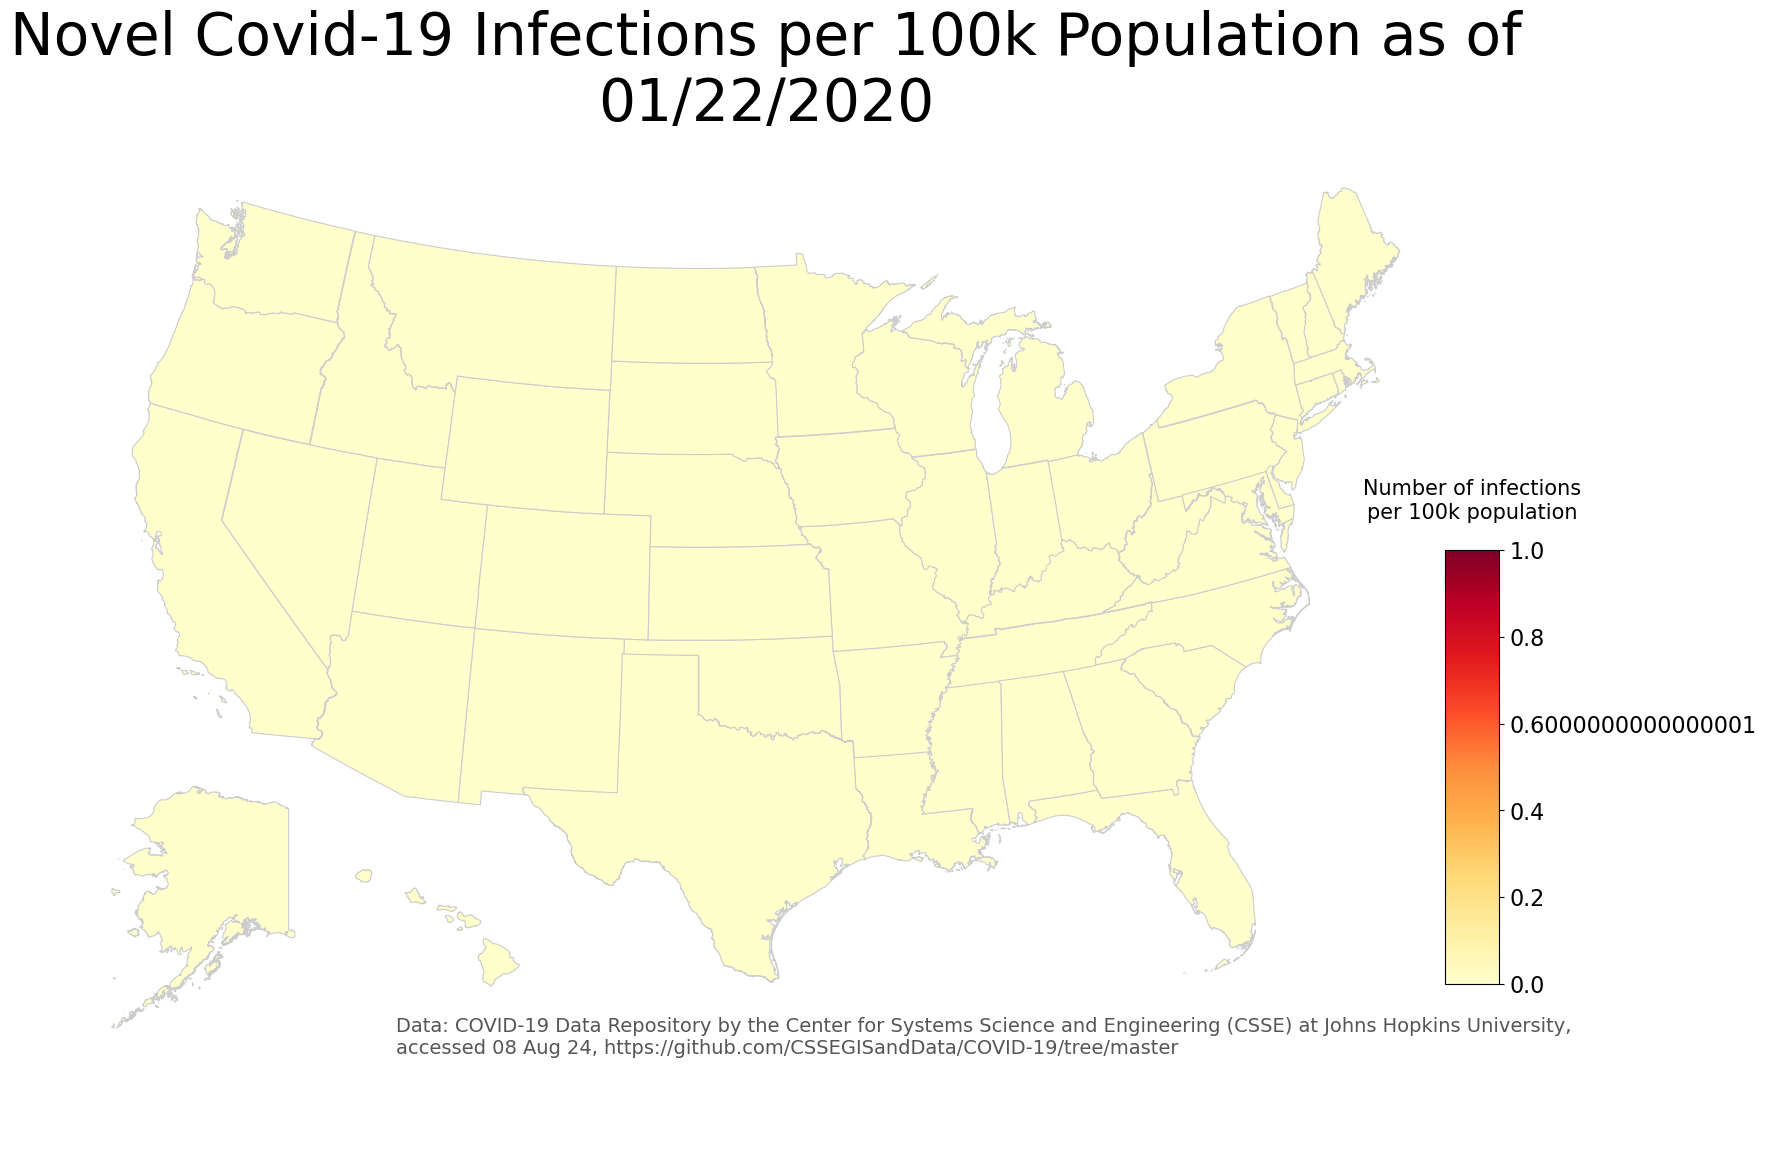

In [84]:
#The variable column that will be visualized
variable = 'Infections as of 1/22/2020'

def makeColorColumn(final_df,variable,vmin,vmax):
    #Creates a column of assigned colors
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrRd)
    final_df['value_determined_color'] = final_df[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return final_df

#Setting the range and bounds for the colorbar
vmin, vmax = final_df["Infections as of 1/22/2020"].min(), final_df["Infections as of 1/22/2020"].max()
colormap = "YlOrRd"
final_df = makeColorColumn(final_df,variable,vmin,vmax)

#Creating a dataframe that would hold the ESPG code which will format the visual
visframe = final_df.to_crs({'init':'epsg:2163'})

#Matplotlib, creating the figure
fig, ax = plt.subplots(1, figsize=(18, 14))
#Removing the axis box from around the visualization
ax.axis('off')

#Title of the graph
ax.set_title('Novel Covid-19 Infections per 100k Population as of\n01/22/2020', fontdict={'fontsize': '42', 'fontweight' : '1'})

#Creating a legend for the colorbar
fig = ax.get_figure()
#Adding in the colorbar axis
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

cbax.set_title('Number of infections\nper 100k population\n', fontdict={'fontsize': '15', 'fontweight' : '0'})

#Adding in a color scale
sm = plt.cm.ScalarMappable(cmap=colormap)
#Reformatting tick labels
sm._A = []
comma_fmt = FuncFormatter(lambda x, p: format(x))
fig.colorbar(sm, cax=cbax, format=comma_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
#Annotating the link to the data
ax.annotate("Data: COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,\naccessed 08 Aug 24, https://github.com/CSSEGISandData/COVID-19/tree/master", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')


#Creating the map
for row in visframe.itertuples():
    if row.Province_State not in ['Alaska','Hawaii']:
        vf = visframe[visframe.Province_State==row.Province_State]
        c = final_df[final_df.Province_State==row.Province_State][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')



#Adding in Alaska
alaskaaxis = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
alaskaaxis.axis('off')
#Polygon for capturing the Aleutian Islands
alaskapolygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska = final_df[final_df.Province_State=='Alaska']
alaska.clip(alaskapolygon).plot(color=final_df[final_df.Province_State=='Alaska'].value_determined_color, linewidth=0.8,ax=alaskaaxis, edgecolor='0.8')


#Adding in Hawii to the bottom left corner
hawaiiaxis = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hawaiiaxis.axis('off')
#Polygon for capturing the entirety of Hawaii
hawaiipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii = final_df[final_df.Province_State=='Hawaii']
hawaii.clip(hawaiipolygon).plot(column=variable, color=hawaii['value_determined_color'], linewidth=0.8,ax=hawaiiaxis, edgecolor='0.8')


fig.savefig('./Data/2020StartInfections.png',dpi=400, bbox_inches="tight")

In [85]:
#Micah
from matplotlib.collections import LineCollection

# new df to find monthly cases in Minnesota
mn_monthly_cases = minnesota_df[["1/31/20","2/28/20","3/31/20","4/30/20","5/31/20","6/30/20","7/31/20","8/31/20","9/30/20","10/31/20","11/30/20","12/31/20",
                                 "1/31/21","2/28/21","3/31/21","4/30/21","5/31/21","6/30/21","7/31/21","8/31/21","9/30/21","10/31/21","11/30/21","12/31/21",
                                 "1/31/22","2/28/22","3/31/22","4/30/22","5/31/22","6/30/22","7/31/22","8/31/22","9/30/22","10/31/22","11/30/22","12/31/22"]]
# Find sum of all counties
mn_monthly_cases.loc["total"] = mn_monthly_cases.sum()

# xlabels
xticklabels = []
for y in range(20,23):
    for m in range(1,13):
        xticklabels.append(f"{m}/20{y}")

#x axis points
periods = list(range(25,61))
mn_monthly_cases.loc["period"] = periods

#create df for new cases per month
new_cases_mn = mn_monthly_cases
new_cases_mn.loc["new_cases"] = new_cases_mn.loc["total"].diff()
new_cases_mn = new_cases_mn.fillna(0)
new_cases_mn = new_cases_mn.transpose()
new_cases_mn = new_cases_mn[["period","new_cases"]]
new_cases_mn.head()


C:\Users\micah\AppData\Local\Temp\ipykernel_12848\2061272900.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mn_monthly_cases.loc["total"] = mn_monthly_cases.sum()
C:\Users\micah\AppData\Local\Temp\ipykernel_12848\2061272900.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mn_monthly_cases.loc["period"] = periods
C:\Users\micah\AppData\Local\Temp\ipykernel_12848\2061272900.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ne

period  new_cases
1/31/20    25.0        0.0
2/28/20    26.0        0.0
3/31/20    27.0      629.0
4/30/20    28.0     4498.0
5/31/20    29.0    19634.0

In [86]:
#Break a single line plot into quarters with different colors
def quarter_lines(df,x_val,y_val,ax):
    # split and reshape line
    points = df[[f"{x_val}", f"{y_val}"]].values.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    #define parameters for graph colors
    colors = ["#E20000", "#0000FF", "#008000", "#4B0082"]
    n_colors = len(colors)
    n_segments = len(segments)
    
    #find the quarter of graph
    segment_length = n_segments // n_colors
    extra_segments = n_segments % n_colors

    #set the colors on the graph
    segment_colors = []
    for i in range(n_colors):
        # Assign color to segments in each color range
        segment_colors.extend([colors[i]] * segment_length)
        # Add remaining segments to the last color if not evenly divisible
        if i == n_colors - 1:
            segment_colors.extend([colors[i]] * extra_segments)

    # Ensure segment_colors length matches n_segments
    segment_colors = segment_colors[:n_segments]
    lc = LineCollection(segments, colors=segment_colors, linewidth=5)
    ax.add_collection(lc)

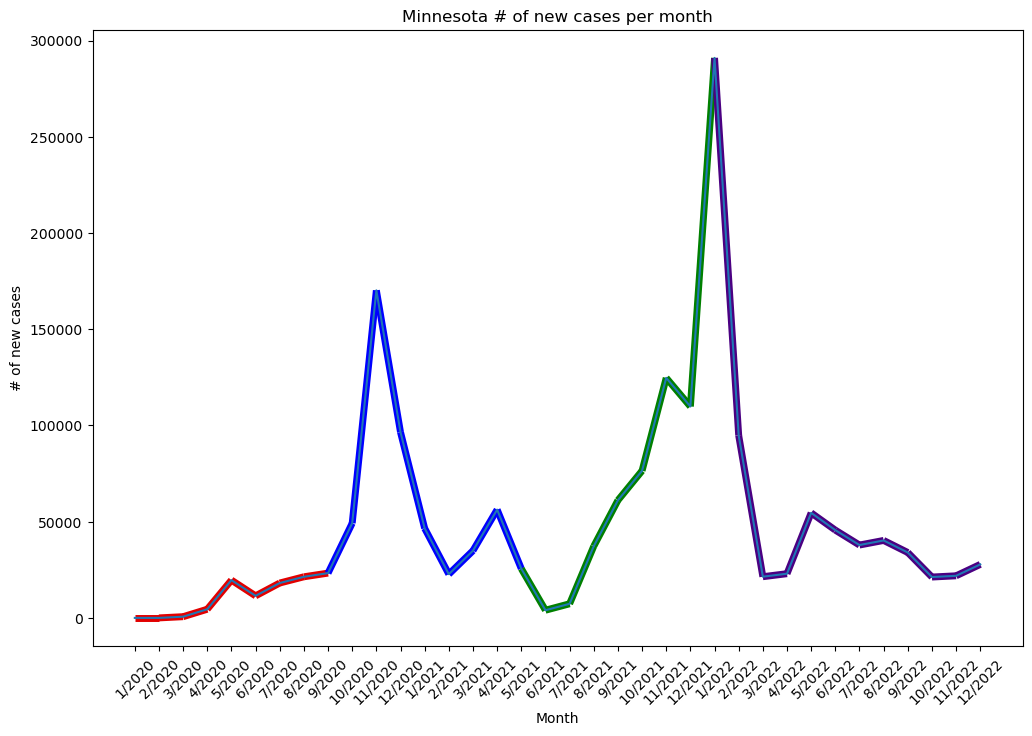

In [87]:
#Plot the number of new cases per month 
fig, ax2 = plt.subplots(figsize=(12, 6))
quarter_lines(new_cases_mn,"period","new_cases",ax2)
plt.plot(new_cases_mn["period"],new_cases_mn["new_cases"])
plt.title("Minnesota # of new cases per month")
plt.ylabel("# of new cases")
plt.xlabel("Month")
plt.xticks(periods,labels=xticklabels,rotation=45)
plt.gcf().set_size_inches(12,8)
plt.show()


In [88]:
#Create a df from the tourism revenue per month in the united states
tourism_df = pd.read_csv("./Data/US_Tourism_TE.csv")
tourism_df["period"] = list(range(1,79))
tourism_df.head()

period month-year  revenue    value
0       1    01-2018     20.4  Billion
1       2    02-2018     20.5  Billion
2       3    03-2018     20.8  Billion
3       4    04-2018     20.1  Billion
4       5    05-2018     20.5  Billion

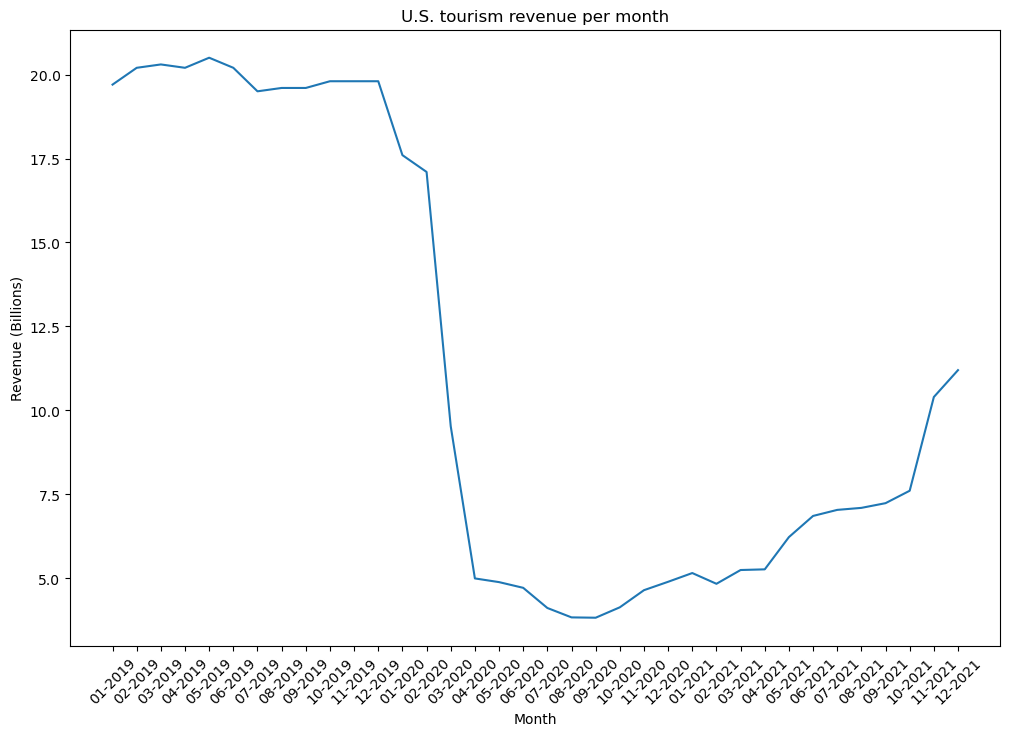

In [89]:
#Create a df of revenue from 2019 to 2021
tourism_2019_2021 = tourism_df.iloc[12:48]

#plot the new dataframe
plt.plot(tourism_2019_2021["period"],tourism_2019_2021["revenue"])
plt.xticks(tourism_2019_2021["period"],labels=tourism_2019_2021["month-year"],rotation=45)
plt.title("U.S. tourism revenue per month")
plt.ylabel("Revenue (Billions)")
plt.xlabel("Month")
plt.gcf().set_size_inches(12,8)
plt.show()

C:\Users\micah\AppData\Local\Temp\ipykernel_12848\2488069528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourism_2020["period"] = periods
C:\Users\micah\AppData\Local\Temp\ipykernel_12848\2488069528.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_2020.loc["total"] = covid_2020.sum()


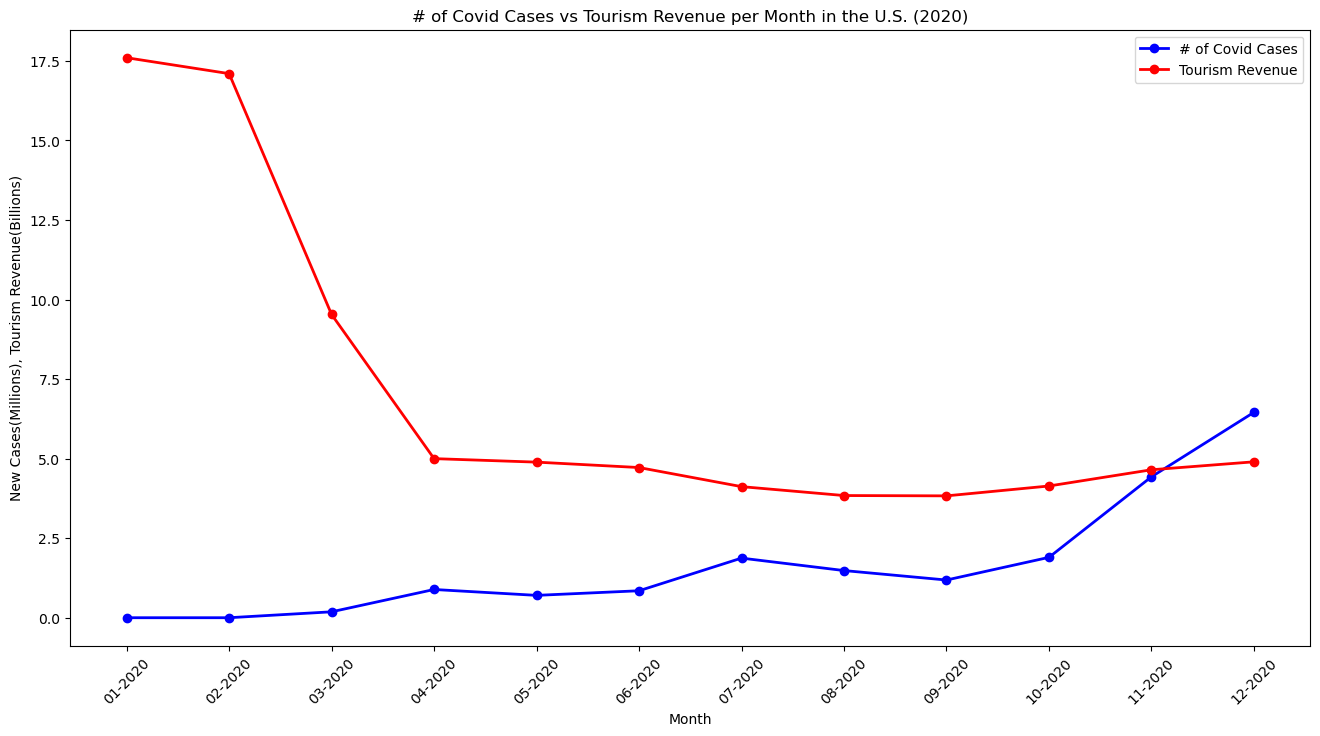

In [90]:
#us tourism compared to covid cases for 2020

#create new df for 2020 revenue per month
periods = list(range(1,13))
tourism_2020 = tourism_df.iloc[24:36]
tourism_2020["period"] = periods

#create new df for 2020 new cases per month
covid_2020 = clean_df[["1/31/20","2/28/20","3/31/20","4/30/20","5/31/20","6/30/20","7/31/20","8/31/20","9/30/20","10/31/20","11/30/20","12/31/20"]]
covid_2020.loc["total"] = covid_2020.sum() 
covid_2020 = covid_2020.transpose()
covid_2020["period"] = periods
covid_2020 = covid_2020[["total","period"]]
covid_2020["new_cases"] = covid_2020["total"].diff().fillna(8)

#convert total to millions
covid_2020["new_cases"] =  covid_2020["new_cases"] / 1_000_000

#plot both covid cases and tourism
plt.plot(covid_2020["period"],covid_2020["new_cases"],label="# of Covid Cases",color="blue",linewidth=2,marker="o")
plt.plot(tourism_2020["period"],tourism_2020["revenue"],label="Tourism Revenue",color="red",linewidth=2,marker="o")
plt.title("# of Covid Cases vs Tourism Revenue per Month in the U.S. (2020)")
plt.ylabel("New Cases(Millions), Tourism Revenue(Billions)")
plt.xlabel("Month")
plt.xticks(periods,labels=tourism_2020["month-year"],rotation=45)
plt.gcf().set_size_inches(16,8)
plt.legend()
plt.show()


C:\Users\micah\AppData\Local\Temp\ipykernel_12848\419429361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourism_2020_2023["period"] = periods
C:\Users\micah\AppData\Local\Temp\ipykernel_12848\419429361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_2020_2023.loc["total"] = covid_2020_2023.sum()


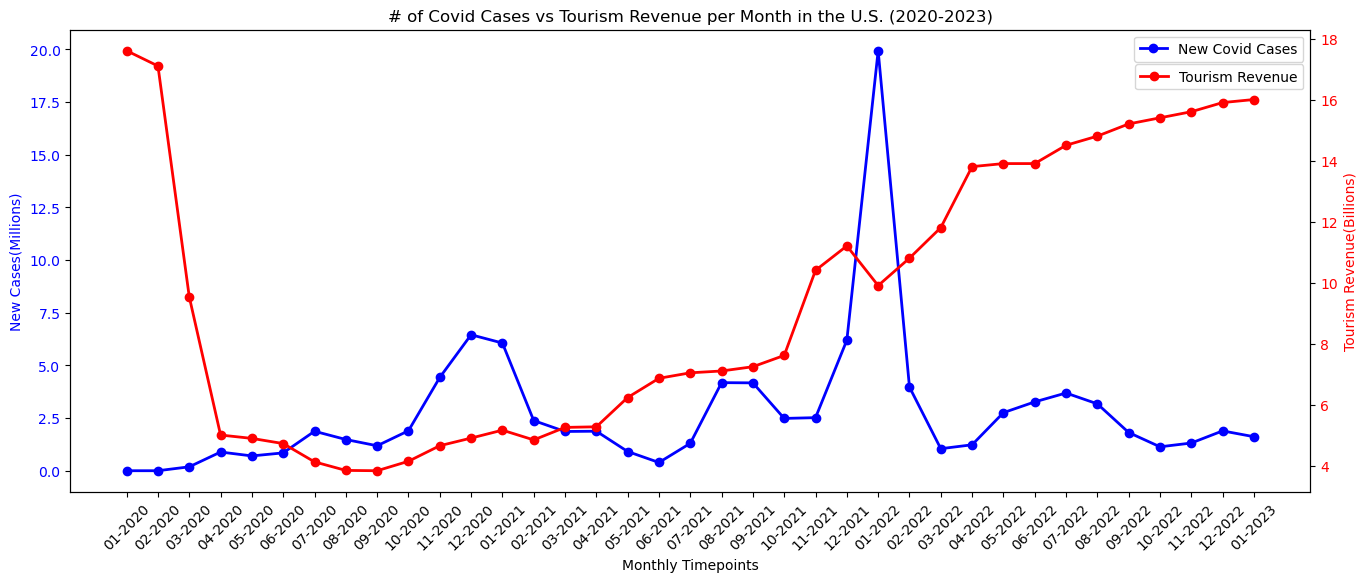

In [91]:
#create new df for revenue from 2020 to 2023
periods = list(range(1,38))
tourism_2020_2023 = tourism_df.iloc[24:61]
tourism_2020_2023["period"] = periods

#create new df for new cases of covid in 2020 to 2023
covid_2020_2023 = clean_df[["1/31/20","2/28/20","3/31/20","4/30/20","5/31/20","6/30/20","7/31/20","8/31/20","9/30/20","10/31/20","11/30/20","12/31/20",
                       "1/31/21","2/28/21","3/31/21","4/30/21","5/31/21","6/30/21","7/31/21","8/31/21","9/30/21","10/31/21","11/30/21","12/31/21",
                       "1/31/22","2/28/22","3/31/22","4/30/22","5/31/22","6/30/22","7/31/22","8/31/22","9/30/22","10/31/22","11/30/22","12/31/22",
                       "1/31/23"]]
covid_2020_2023.loc["total"] = covid_2020_2023.sum() 
covid_2020_2023 = covid_2020_2023.transpose()
covid_2020_2023["period"] = periods
covid_2020_2023 = covid_2020_2023[["total","period"]]
covid_2020_2023["new_cases"] = covid_2020_2023["total"].diff().fillna(8)

#convert total to millions
covid_2020_2023["new_cases"] =  covid_2020_2023["new_cases"] / 1_000_000

#plot number of new cases on first axis
fig, ax1 = plt.subplots()
ax1.set_ylabel("New Cases(Millions)",color="blue")
ax1.set_xlabel("Monthly Timepoints")
ax1.plot(covid_2020_2023["period"],covid_2020_2023["new_cases"],color="blue",linewidth=2,marker="o",label="New Covid Cases")
ax1.tick_params(axis='y', labelcolor="blue")

#plot revenue amount on second axis
ax2 = ax1.twinx()
ax2.set_ylabel("Tourism Revenue(Billions)",color="red")
ax2.plot(tourism_2020_2023["period"],tourism_2020_2023["revenue"],color="red",linewidth=2,marker="o",label="Tourism Revenue")
ax2.tick_params(axis='y', labelcolor="red")
plt.title("# of Covid Cases vs Tourism Revenue per Month in the U.S. (2020-2023)")

#params for plot
ax1.set_xticks(periods)
ax1.set_xticklabels(labels=tourism_2020_2023["month-year"],rotation=45)
plt.gcf().set_size_inches(16,6)
ax1.legend(loc="upper right")
ax2.legend(loc="upper right", bbox_to_anchor=(1, .94))
plt.show()